<div align="center">
  <h6>
  <h1><b>Ant Colony Optimization and Its Application to
the Vehicle Routing Problem with Pickups and
Deliveries</b></h1>
  <h3><b>Advanced Algorithms</b></h3>

  <h3><b>Group 20</b></h3>

  <b>Student Members:</b><br>
  Nguyễn Thành Đạt - 2570163<br>
  Lê Phước Thành - 2570322<br>
  Lê Đức Phương - 2570480<br>
  Hồ Bảo An - 2570164<br>
  
  <b>Instructor:</b><br>
  Dr. Le Hong Trang
  <br>
  <br>
  December 24th, 2025
</div>
<hr>


# SECTION 1: INTRODUCTION

## 1.1 Problem Statement

Many problems in transportation and logistics can be formulated as optimization problems, where the objective is to minimize cost, distance, or time while satisfying a set of constraints. A large number of these problems are computationally difficult, especially as the problem size increases. One well-known example is the Vehicle Routing Problem (VRP), which focuses on determining optimal routes for a fleet of vehicles that start and end at a central depot while serving a set of customers [5, 6, 14, 22, 30, 31].

In the classical VRP, customers require only delivery services. However, many real-world scenarios require vehicles to both deliver and collect goods during the same route. This leads to the Vehicle Routing Problem with Pickups and Deliveries (VRPPD) [28]. In VRPPD, the load of a vehicle changes dynamically along its route, making it more complex than the classical VRP. In particular, vehicle capacity constraints must be satisfied at all times during the route.

Several important variants of VRPPD have been studied in the literature. The Vehicle Routing Problem with Backhauls (VRPB) assumes that all delivery customers are served before any pickup customer. A more general and challenging variant is the Mixed Vehicle Routing Problem with Backhauls (MVRPB), where delivery and pickup customers can be visited in any order. Another variant is the Vehicle Routing Problem with Simultaneous Pickups and Deliveries (VRPSPD), where both pickup and delivery operations may occur at the same customer location
.

Among these variants, MVRPB and VRPSPD are particularly difficult because vehicle load feasibility must be maintained throughout the entire route regardless of the visiting sequence. This requirement significantly increases the complexity of the problem. As a result, these variants are classified as NP-hard, making exact solution approaches impractical for large-scale problem instances.



## 1.2 Applications

Vehicle Routing Problems with Pickups and Deliveries arise in many real-world logistics applications. A common example is the distribution of bottled beverages, where full bottles are delivered to customers and empty bottles are collected for recycling or reuse [11]. Similar situations occur in the chemical industry, where containers or residual materials must be retrieved after delivery [9].

Other applications include laundry services, in which clean clothes are delivered and used clothes are collected, as well as rental and reverse logistics systems. Waste collection and postal services may also involve both pickup and delivery operations within the same routing process [11]. These applications demonstrate the practical importance of VRPPD, as efficient routing solutions can significantly reduce operational costs and improve service quality.

## 1.3 Literature Review

Due to the computational difficulty of VRPPD and its variants, many solution methods have been proposed in previous studies. Early approaches mainly relied on simple heuristic techniques, such as load-based insertion heuristics [7, 24, 33]. These methods construct routes incrementally while checking capacity constraints. Although they are fast and easy to implement, their solution quality is often limited.

More advanced approaches use metaheuristic algorithms. Tabu Search (TS) has been widely applied to VRPPD by exploring solution neighborhoods while avoiding repeated search patterns [12]. TS is effective in improving local solutions, but its performance [27, 3] depends heavily on parameter tuning and neighborhood design.

Large Neighborhood Search (LNS) [32] is another powerful approach that has been used for VRPPD. By repeatedly removing and reinserting parts of a solution, LNS can escape local optima and produce high-quality solutions. However, LNS can be computationally expensive, especially for large instances.

Genetic Algorithms (GA) [37] have also been applied to VRPPD as population-based search methods [16]. GAs provide strong global exploration capabilities through crossover and mutation. Nevertheless, designing genetic operators that preserve feasibility in VRPPD is challenging, which increases implementation complexity.

Although these methods have achieved promising results, they still face difficulties in balancing solution quality, computational efficiency, and feasibility management. These challenges motivate the exploration of alternative solution methods for complex VRPPD variants such as MVRPB and VRPSPD [5, 6].

## 1.4 Motivation for Using Ant Colony Optimization

The Mixed Vehicle Routing Problem with Backhauls (MVRPB) and the Vehicle Routing Problem with Simultaneous Pickups and Deliveries (VRPSPD) are computationally challenging NP-hard extensions of the classical Capacitated Vehicle Routing Problem (CVRP).

* **Key Challenges:** Unlike standard VRP, these variants require handling both delivery and pickup operations within the same route. This creates bidirectional commodity flows and complex interdependencies between routing decisions and vehicle load dynamics.
* **Limitations of Traditional Methods:**
    * **Construction Heuristics:** Often produce suboptimal solutions due to greedy nature.
    * **Tabu Search (TS):** Requires careful tuning and struggles with the intensification-diversification balance.
    * **Large Neighborhood Search (LNS):** Can be computationally expensive with large destroy-repair neighborhoods.
    * **Genetic Algorithms (GA):** Face challenges in designing crossover operators that preserve route feasibility.

**Why ACO?**
Ant Colony Optimization (ACO) offers a distinct paradigm:
1.  **Constructive Building:** Ants build solutions incrementally, allowing for the natural incorporation of complex constraints (like capacity checks at every step).
2.  **Collective Learning:** Pheromones act as long-term memory to capture successful routing patterns.
3.  **Heuristic Integration:** It allows for the flexible integration of problem-specific heuristics (e.g., savings and load balancing) directly into the probabilistic construction.
4.  **Hybridization:** It naturally pairs with local search for post-construction refinement.


# SECTION 2: METHOD

## 2.1 Overview of Ant Colony Optimization

**1. Biological Inspiration**

Ant Colony Optimization is inspired by the foraging behavior of real ant colonies, specifically their ability to discover shortest paths between a nest and food sources.
* **Stigmergy:** Ants communicate indirectly by depositing pheromone trails on the ground.
* **Positive Feedback:** Shorter paths allow faster traversal, leading to faster pheromone accumulation, which increases the probability of selection by subsequent ants.
* **Negative Feedback (Evaporation):** Pheromone evaporates over time, reducing the attractiveness of less viable paths and preventing premature convergence to suboptimal solutions.

This biological phenomenon was translated into a computational metaheuristic by Dorigo and colleagues in the early 1990s. In this framework, the problem is modeled as a graph where nodes represent solution components (e.g., customers) and edges represent transitions.

**2. General ACO Framework**

The algorithm operates in iterative cycles consisting of three main phases:

**a. Solution Construction Phase**

$m$ artificial ants construct complete solutions step-by-step. Starting from an initial node (e.g., the depot), an ant $k$ at node $i$ selects the next node $j$ from the feasible neighborhood $N_i^k$ using a probabilistic transition rule.

The probability $p_{ij}^k$ is typically a function of:

1. **Pheromone Intensity ($\tau_{ij}$):** The learned desirability based on past experience.
2. **Heuristic Visibility ($\eta_{ij}$):** Problem-specific greedy information (e.g., distance savings).

The selection probability balances learned knowledge (exploitation) and heuristic guidance (exploration) controlled by parameters $\alpha$ and $\beta$.

**b. Pheromone Update Phase**

After solution construction, pheromone trails are updated. This process involves:

1. **Evaporation:** All pheromone values are reduced to "forget" poor decisions.
$$\tau_{ij} \leftarrow (1 - \rho) \cdot \tau_{ij}$$
Where $\rho \in (0, 1]$ is the evaporation rate.

2. **Reinforcement:** Pheromone is deposited on edges belonging to good solutions. Different ACO variants use different strategies:

    * **Ant System (AS):** All ants deposit pheromone.
    * **Ant Colony System (ACS):** Only the best-so-far ant deposits pheromone.
    * **MAX-MIN Ant System (MMAS):** Uses a rank-based approach (only top-ranked ants update) and imposes explicit bounds $[\tau_{\min}, \tau_{\max}]$ to maintain diversity.

**c. Daemon Actions (Optional)**

Centralized procedures executed at the end of an iteration, such as Local Search (e.g., 2-opt, swap) to improve the ant-constructed solutions. This hybridization is highly effective for routing problems.

**3. ACO Applied to Vehicle Routing (VRP)**

In VRP contexts, the graph nodes correspond to customers and the depot.
* Ants build routes by iteratively adding customers until constraints (capacity, time) are met, then returning to the depot to start a new route.
* Critical Design Decisions:
  * **Heuristic Information ($\eta_{ij}$):** Defines the greedy "attractiveness" of a move (e.g., savings, urgency).
  * **Constraint Handling:** Ensuring capacity and precedence are respected during construction.
  
For VRPPD (VRP with Pickup and Delivery) specifically, complexity increases because feasibility depends on the sequence of pickups and deliveries, not just total load26. Therefore, the heuristic information must guide ants toward sequences that are both distance-efficient and load-feasible.

## 2.2 The Ant Algorithm for VRPPD

### 2.2.1 Initialization

* **Balanced starting conditions** enable effective exploration and exploitation throughout the optimization process

The initialization phase establishes the foundation for the ant colony to begin its search for optimal solutions. This critical step sets up the initial conditions that guide the entire optimization process.* **Good initial bounds** ($\tau_{max}$ and $\tau_{min}$ in MMAS) help maintain solution diversity

* **Proper pheromone initialization** prevents the algorithm from being biased toward poor solutions

**1. Initial Pheromone Level ($\tau_0$)**The initialization phase is crucial because:



At the start of the algorithm, an initial amount of pheromone $\tau_{0}$ is placed on each edge (arc) connecting nodes in the graph:* More sophisticated heuristic information (as described in Section 2.2.2) that accounts for both distance and load considerations

* Vehicle capacity constraints that will be checked during route construction

$$\tau_{ij} = \tau_{0} = \frac{K}{L_{0}}$$* The depot as the mandatory starting and ending point for all routes

For the Vehicle Routing Problem with Pickups and Deliveries, the initialization must also consider:

Where:

* $K$ is the number of ants in the colony**5. Implementation in VRPPD Context**

* $L_{0}$ is the length of an initial feasible solution

* $\tau_{ij}$ represents the pheromone level on the edge from node $i$ to node $j$* Allows parallel exploration of different regions of the solution space

* Prevents all ants from starting with identical solutions

**2. Nearest-Neighbor Heuristic for $L_0$*** Promotes diversity in the initial search

All $K$ artificial ants are randomly placed at different cities (customers) to begin the search process. This random initialization:

The initial solution length $L_0$ is typically obtained using a simple **nearest-neighbor (NN) heuristic**:

**4. Ant Placement**

* Starting from the depot (node 0), the algorithm repeatedly selects the nearest unvisited customer

* This process continues until all customers are visitedWhere $d_{ij}$ is the distance from customer $i$ to customer $j$. This simple heuristic guides ants to prefer closer customers.

* The vehicle then returns to the depot

* The total distance of this tour becomes $L_0$$$\eta_{ij} = \frac{1}{d_{ij}}$$



While the NN heuristic may not produce optimal solutions, it provides:In the basic Ant System, the desirability (or visibility) between a pair of cities $i$ and $j$ is computed as the inverse of the distance between them:

* A quick and reasonable estimate of solution quality

* A basis for initializing pheromone levels appropriately**3. Heuristic Information (Visibility)**

* A starting point that prevents premature convergence

### 2.2.2 Heuristic Information Design ($\eta_{ij}$)

In the context of MVRPB (Mixed Vehicle Routing Problem with Backhauls) and VRPSPD (VRP with Simultaneous Pickups and Deliveries), the heuristic information must capture two essential aspects:

1. **Distance-based efficiency:** Minimizing total travel distance.
2. **Capacity-based feasibility:** Managing the complex interplay between pickups and deliveries to ensure the vehicle does not violate capacity constraints.

The proposed algorithm uses a Composite Heuristic that integrates an *Enhanced Savings Function with a Dynamic Load-Based Component*.

**1. Enhanced Savings Function ($s^{enh}_{ij}$)**

This component addresses the static compatibility of two customers. It modifies the classical Clarke-Wright savings ($s_{ij}$) to penalize connecting customers with highly dissimilar demand profiles, as these connections are more likely to create capacity conflicts.

The classical savings is defined as:

$$s_{ij} = d_{0i} + d_{0j} - d_{ij}$$

Where $d$ represents the distance/cost and $0$ represents the depot.

The Enhanced Savings Function is defined as:

$$s^{enh}_{ij} = \lambda \cdot s_{ij} - \mu \cdot |q^d_i - q^d_j| - \nu \cdot |q^p_i - q^p_j|$$

Where:
* $q^d_i, q^p_i$: Delivery and Pickup quantities for customer $i$.
* $\lambda, \mu, \nu$: Weighting parameters.
* The penalty terms ($- \mu |...|$ and $- \nu |...|$) discourage connecting customers with dissimilar delivery/pickup patterns to ensure smoother load profiles.

**2. Dynamic Load-Based Component**

This component addresses the dynamic state of the vehicle. The desirability of visiting a customer depends on the current vehicle load. For example, if the vehicle is nearly full, a customer with a net pickup ($q^p > q^d$) might be infeasible, whereas a customer with a net delivery ($q^d > q^p$) clears space.

We define a load ratio $R_j$ for candidate customer $j$:

$$R_j = \frac{q^p_j - q^d_j}{\bar{q}^p + \bar{q}^d}$$

* $\bar{q}^p, \bar{q}^d$: Average pickup and delivery quantities across all customers.
* Interpretation: A positive $R_j$ means visiting $j$ decreases the load (net delivery). A negative $R_j$ means visiting $j$ increases the load (net pickup).

The Load Attractiveness is activated conditionally based on the current vehicle load ($Load_{curr}$) and total Capacity ($Q$):

$$\text{Load-Attractiveness}(j) =
\begin{cases}
1 + \gamma \cdot R_j & \text{if } Load_{curr} > \frac{Q}{2} \\
1 & \text{otherwise}
\end{cases}$$

Rationale:
* Early Route ($Load < Q/2$): Capacity is abundant; decisions focus on distance.
* Late Route ($Load > Q/2$): Capacity is binding. The algorithm biases selection toward customers that help balance the load (via the $\gamma$ parameter).

**3. Composite Heuristic Formula**

The final heuristic value $\eta_{ij}$ used in the ACO transition rule combines both components:

$$\eta_{ij} = s^{enh}_{ij} \times \text{Load-Attractiveness}(j)$$

This formula ensures that ants are guided by both geometric savings and capacity feasibility constraints specific to the pickup-delivery structure.

**4. Implementation Note:**
* Complexity: The enhanced savings $s^{enh}_{ij}$ requires $O(n^2)$ precomputation.
* Efficiency: The load-based component adds negligible overhead as it uses simple arithmetic during the construction phase.
* Parameters: $\lambda, \mu, \nu, \gamma$ should be tuned (e.g., via racing algorithms) for specific problem instances.

### 2.2.3 Route Construction

The construction phase is the core of the ACO algorithm, where individual ants create feasible solutions that will later be evaluated and used to update pheromone trails.

The route construction phase is where each ant builds its own solution by iteratively selecting customers to visit. This process mimics the foraging behavior of real ants, using a combination of pheromone trails and heuristic information to make probabilistic decisions.

* **Problem-Specific Heuristics**: The visibility function $\eta_{ij}$ (Section 2.2.2) incorporates domain knowledge about VRPPD

**1. Construction Process Overview*** **Adaptive Learning**: Pheromone trails guide the search toward better regions of the solution space

* **Probabilistic Nature**: Generates diverse solutions across different ants

Each ant constructs its route by:* **Flexibility**: Naturally handles complex constraints during construction

* Starting from the depot

* Iteratively moving from one customer to another**7. Advantages of the Construction Approach**

* Maintaining a partial solution (list of visited customers)

* Returning to the depot when no more customers can be added to the current routeIf unvisited customers remain, a new route (vehicle) is dispatched from the depot.

* Starting a new route if unvisited customers remain

* All customers have been visited

**2. Probabilistic Transition Rule*** No more customers can be feasibly added (capacity constraints)

A route ends and the vehicle returns to the depot when:

An ant $k$ currently at customer $i$ selects the next customer $j$ to visit based on a **transition probability** $p_{ij}^{k}$:

**6. Route Termination**

$$p_{ij}^{k} = \begin{cases} \frac{\tau_{ij}^{\alpha} \eta_{ij}^{\beta}}{\sum_{l \in N_{i}^{k}} \tau_{il}^{\alpha} \eta_{il}^{\beta}} & \text{if } j \in N_{i}^{k} \\ 0 & \text{otherwise} \end{cases}$$

* Reduces computation time from $O(n)$ to $O(k)$ per selection, where $k \ll n$

Where:* This subset includes customers with high heuristic values (close distance, favorable load characteristics)

* $N_{i}^{k}$ is the set of feasible unvisited customers (those that can be added without violating constraints)* Instead of considering all unvisited customers, only evaluate a subset $N_{ik}$ containing the most promising candidates

* $\tau_{ij}$ is the pheromone level on edge $(i,j)$To improve computational efficiency, the algorithm can use a **candidate list**:

* $\eta_{ij}$ is the heuristic information (visibility) for moving from $i$ to $j$

* $\alpha$ and $\beta$ are parameters controlling the relative importance of:**5. Candidate List (Optional Enhancement)**

  * **Pheromone ($\alpha$)**: Learned experience from previous ants

  * **Heuristic ($\beta$)**: Problem-specific greedy information* The vehicle must have enough space to pick up goods

* At each customer, the vehicle must have enough goods to deliver

**3. Pseudo-Random Proportional Rule (ACS)****b) Load Feasibility:**



The implementation uses the **Ant Colony System (ACS)** rule, which balances exploitation and exploration more explicitly than the basic Ant System:  Where $D_j$ is delivery demand and $P_j$ is pickup demand at customer $j$

  $$\text{Load}_{\text{after } j} = \text{Load}_{\text{arrival at } j} - D_j + P_j$$

When ant $k$ at node $i$ needs to select the next node $j$:* The vehicle load after serving $j$ must remain within $[0, Q]$:

* The total delivery demand on the route (including $j$) must not exceed vehicle capacity $Q$

* **With probability $q_0$ (Exploitation):****a) Capacity Constraint:** 

  $$j = \arg\max_{u \in N_i^k} \{[\tau_{iu}]^\alpha \cdot [\eta_{iu}]^\beta\}$$

  Before adding customer $j$ to the current route, the algorithm verifies:

  The ant deterministically selects the node with the maximum combined value of pheromone and heuristic information.

**4. Feasibility Checking for VRPPD**

* **With probability $1-q_0$ (Exploration):**

  * Lower $q_0$ (e.g., 0.1): More exploration, better diversity

  The ant selects node $j$ using the probabilistic rule $p_{ij}^{k}$ (biased random selection).* Higher $q_0$ (e.g., 0.9): More exploitation, faster convergence

The parameter $q_0 \in [0,1]$ controls the balance:

### 2.2.4 Local Search

Local search transforms ACO from a pure constructive heuristic into a powerful **hybrid metaheuristic**, combining the global exploration capabilities of ant colony with the local exploitation power of neighborhood search.

Local search is a critical enhancement to the basic ACO algorithm that significantly improves solution quality. After each ant constructs a complete solution, local search procedures are applied to refine and optimize the routes.

4. This ensures that pheromone trails are deposited on high-quality solution components

**1. Purpose and Importance**   * Pheromone update (Section 2.2.5)

   * Evaluating ant performance

Local search procedures:3. The **improved solution** is used for:

* **Improve solution quality**: Reduce the total distance of routes constructed by ants2. **Immediately after construction**, local search is applied to improve the ant's solution

* **Escape local optima**: Help the algorithm find better configurations by exploring the neighborhood of current solutions1. Each ant constructs a solution using the probabilistic rules (Section 2.2.3)

* **Enhance convergence speed**: Allow the algorithm to reach high-quality solutions fasterIn the ACO framework:

* **Proven effectiveness**: Studies show that incorporating local search significantly boosts ACO performance on routing problems

**8. Integration with ACO**

**2. Main Local Search Operators**

* Local search helps ACO compete with or outperform other metaheuristics

The algorithm applies two primary local search operators sequentially:* The computational overhead is justified by significant quality improvements

* The combination of ACO (global search) + Local Search (local refinement) is highly effective

**a) SWAP Operator*** Local search can improve solution quality by **5-15%** on average

Empirical studies demonstrate that:

The SWAP operator exchanges the positions of two customers:

**7. Impact on Algorithm Performance**

* **Intra-route SWAP**: Exchanges two customers within the same route

  * Given route: Depot → ... → $c_i$ → ... → $c_j$ → ... → Depot* **MOVE operators**: Similar complexity to SWAP

  * After swap: Depot → ... → $c_j$ → ... → $c_i$ → ... → Depot* **Inter-route SWAP**: $O(n_1 \times n_2)$, where $n_1, n_2$ are customers in routes 1 and 2

  * Checks if the new route order reduces total distance while maintaining feasibility* **Intra-route SWAP**: $O(n^2)$ per route, where $n$ is the number of customers in the route



* **Inter-route SWAP**: Exchanges two customers between different routes**6. Computational Complexity**

  * Route 1: Depot → ... → $c_i$ → ... → Depot

  * Route 2: Depot → ... → $c_j$ → ... → Depot* Use efficient data structures to quickly calculate distance changes

  * After swap:* Try all possible insertion positions for MOVE

    * Route 1: Depot → ... → $c_j$ → ... → Depot* Systematically explore all pairs of customers for SWAP

    * Route 2: Depot → ... → $c_i$ → ... → Depot**Neighborhood Exploration Order:**

  * Must verify capacity constraints for both routes after the exchange

  * Recommended for small to medium-sized instances

**b) MOVE Operator**  * Slower but finds better local optima

* **Best-Improvement**: Evaluate all possible moves and select the best one

The MOVE operator relocates a customer from one position to another:  * May miss better nearby solutions

  * Faster computation

* **Intra-route MOVE**: Removes a customer from its current position and inserts it into a different position within the same route* **First-Improvement**: Accept the first move that reduces total distance

  * Given route: Depot → ... → $c_i$ → ... → $c_j$ → ... → Depot**First-Improvement vs. Best-Improvement:**

  * Remove $c_i$ and try inserting it between every pair of consecutive customers

  * Select the insertion position that gives the maximum distance reduction**5. Implementation Strategy**



* **Inter-route MOVE**: Removes a customer from one route and inserts it into another route* **Solution completeness**: All customers must remain served after the operation

  * Remove customer $c_i$ from Route 1

  * Try inserting $c_i$ at all feasible positions in Route 2  $$\text{Load}_{\text{after } c_i} = \text{Load}_{\text{arrival}} - D_i + P_i$$

  * Accept the move if it reduces total distance and maintains feasibility  Where the load changes according to:

  $$0 \leq \text{Load}_{\text{at customer}} \leq Q$$

**3. Application Sequence*** **Load feasibility**: At every customer along the route:

* **Capacity constraints**: Total delivery demand on each route ≤ vehicle capacity

The local search procedures are applied **sequentially** after route construction:

For each potential move (SWAP or MOVE), the algorithm must verify:

1. **First**: Apply SWAP operators (intra-route, then inter-route)

2. **Second**: Apply MOVE operators (intra-route, then inter-route)**4. Feasibility Verification for VRPPD**

3. **Iterate**: Repeat until no further improvement is found (local optimum reached)

### 2.2.5 Pheromone Update

The Rank-Based MMAS strategy represents a sophisticated evolution of the basic Ant System, incorporating lessons learned from decades of ACO research. It provides robust performance across diverse problem instances while maintaining the elegant simplicity of the ant colony metaphor.

Pheromone update is the learning mechanism of ACO, allowing the colony to accumulate and exploit experience from successful ants. This process balances between reinforcing good solutions and maintaining exploration diversity.

5. **Repeat**: Next iteration starts with updated pheromone matrix

**1. Overview of Pheromone Update**4. **Pheromone Update** (this section): Reinforce good solutions, evaporate poor ones

3. **Local Search** (Section 2.2.4): Improve constructed solutions

After all ants complete their route construction (and local search), pheromone levels on all edges are updated through two processes:2. **Construction** (Section 2.2.3): Ants build solutions guided by pheromones and heuristics

1. **Initialization** (Section 2.2.1): Set up initial pheromones

* **Evaporation**: Reduces pheromone on all edges uniformlyPheromone update completes the ACO cycle:

* **Reinforcement**: Adds pheromone to edges belonging to good solutions

**8. Integration with Other Components**

**2. Basic Pheromone Update Rule**

* **Enables collective learning**: The colony as a whole learns from individual ant experiences

In the standard Ant System, the update rule is:* **Prevents stagnation**: Through evaporation and MIN-MAX bounds

* **Creates a positive feedback loop**: Good edges get more pheromone → More likely to be selected → Reinforced further

$$\tau_{ij} \leftarrow (1-\rho)\tau_{ij} + \sum_{k=1}^{K} \Delta \tau_{ij}^{k}$$* **Guides future ants** toward successful solution components

The pheromone update mechanism:

Where:

* $\rho \in (0,1]$ is the **evaporation rate****7. Impact on Algorithm Behavior**

* $(1-\rho)\tau_{ij}$ represents the pheromone remaining after evaporation

* $\Delta \tau_{ij}^{k}$ is the amount of pheromone deposited by ant $k$ on edge $(i,j)$Total: $O(n^2)$ per iteration, which is acceptable for the benefits gained.



**a) Evaporation Process*** MIN-MAX clamping: $O(n^2)$ - check all edges

* Reinforcement: $O(k \cdot m)$ - for $k$ routes and $m$ ranked ants

Pheromone evaporation serves several purposes:* Evaporation: $O(n^2)$ - update all edges

* **Prevents premature convergence**: Without evaporation, early solutions would dominate the search

* **Forgets poor decisions**: Less-traveled edges gradually lose their influence**6. Computational Efficiency**

* **Maintains exploration**: Allows new, potentially better solutions to emerge

* Allows the algorithm to explore freely in early iterations

The evaporation rate $\rho$ controls the balance:* Prevents bias toward any particular solution structure

* Higher $\rho$ (e.g., 0.5): Faster forgetting, more exploration* This gives all edges equal attractiveness at the start

* Lower $\rho$ (e.g., 0.1): Slower forgetting, more exploitation of learned knowledge* Initially, set all $\tau_{ij} = \tau_{\max}$ (or $\tau_0$ from Section 2.2.1)

Proper initialization is crucial:

**b) Pheromone Deposition**

**5. Pheromone Initialization**

The pheromone deposited by ant $k$ is typically inversely proportional to its solution quality:

* Later iterations: More GB updates (exploitation)

$$\Delta \tau_{ij}^{k} = \begin{cases} \frac{1}{L^{k}} & \text{if ant } k \text{ uses edge } (i,j) \\ 0 & \text{otherwise} \end{cases}$$* Early iterations: More IB updates (exploration)

* Use a weighted combination (as in the rank-based formula above)

Where $L^{k}$ is the total distance of the routes constructed by ant $k$. This means:* Alternate between IB and GB updates, or

* Shorter routes → More pheromone deposited**Hybrid Strategy:**

* Longer routes → Less pheromone deposited

  * Reinforces the best-known solution

**3. Rank-Based MAX-MIN Ant System (MMAS)**  * Promotes exploitation

* **Global-Best (GB)**: Update using the best solution found so far

The implementation uses an advanced pheromone update strategy that combines **ranking** with **MIN-MAX bounds**:  * Adapts quickly to new promising regions

  * Promotes exploration

**a) Rank-Based Update*** **Iteration-Best (IB)**: Update using the best ant in the current iteration

**Iteration-Best vs. Global-Best:**

Instead of allowing all ants to deposit pheromone, only the **$w$ best-ranked ants** in the current iteration and the **global-best ant** (best solution found so far) are permitted to update pheromones:

**4. Update Frequency and Strategy**

$$\tau_{ij} \leftarrow (1-\rho)\tau_{ij} + \sum_{r=1}^{w} (w-r) \Delta \tau_{ij}^{r} + w \Delta \tau_{ij}^{gb}$$

* **Together**: Maintain a balance between exploitation and exploration throughout the search

Where:* **$\tau_{\min}$**: Ensures all edges retain some attractiveness, allowing recovery from suboptimal convergence

* $\Delta \tau_{ij}^{r} = 1/L^{r}$ is the pheromone from the $r$-th ranked ant (where $r=1$ is the best)* **$\tau_{\max}$**: Prevents any edge from becoming too dominant

* $(w-r)$ is the weight given to ant $r$: better-ranked ants deposit more pheromone**Purpose of MIN-MAX bounds:**

* $\Delta \tau_{ij}^{gb} = 1/L^{gb}$ is the pheromone from the global-best ant

* $w$ is the weight given to the global-best solution (typically equal to the number of ranked ants)  Where $a$ is a factor (e.g., $a=10$ or $a=100$)

  $$\tau_{\min} = \frac{\tau_{\max}}{a}$$

**Benefits of Rank-Based Update:*** $\tau_{\min}$ is set as a fraction of $\tau_{\max}$:

* Focuses learning on high-quality solutions

* Reduces noise from poor solutions  Where $L^{gb}$ is the length of the global-best solution

* Accelerates convergence to good solution regions  $$\tau_{\max} = \frac{1}{\rho \cdot L^{gb}}$$

* Maintains a balance between iteration-best and global-best guidance* $\tau_{\max}$ is dynamically updated based on the best solution found:



**b) MIN-MAX Bounds****Calculating $\tau_{\max}$ and $\tau_{\min}$:**



To prevent premature convergence and maintain diversity, pheromone levels are **explicitly bounded**:$$\tau_{ij} = \begin{cases} \tau_{\max} & \text{if } \tau_{ij} > \tau_{\max} \\ \tau_{\min} & \text{if } \tau_{ij} < \tau_{\min} \\ \tau_{ij} & \text{otherwise} \end{cases}$$



$$\tau_{\min} \leq \tau_{ij} \leq \tau_{\max}$$After each update, all pheromone values are clamped:


# SECTION 3: IMPLEMENTATION


## ACO Class Implementation

### Explanation of the `AntColonyOptimizer` Class

The `AntColonyOptimizer` class is constructed to solve the **Vehicle Routing Problem with Simultaneous Pickups and Deliveries (VRPSPD)**. The objective is to minimize the total travel distance of vehicles while serving all customers from a single depot. The core algorithm is **Ant Colony Optimization (ACO)** [18].

**1. Initialization (`__init__`)**

* **Parameters:** Includes the number of ants (`num_ants`), number of iterations (`num_iterations`), coefficients `alpha` ($\alpha$), `beta` ($\beta$), evaporation rate (`evaporation_rate` - $\rho$), and problem details (distance matrix, demands, vehicle capacity).

* **Pheromone Matrix ($\tau_{ij}$):** Stores the "experience" of the ant colony regarding the quality of the edge $(i,j)$. In the MAX-MIN Ant System (MMAS) implementation, pheromones are typically initialized with an initial $\tau_{max}$ value. The $\tau_{max}$ value can be estimated based on $L_0$ (the route length from an initial heuristic, e.g., Nearest Neighbor - NN), following the formula (similar to Eq. 6 in Çatay's paper, with $L^*$ being $L_0$):

  $$\tau_{max\_initial} = \frac{1}{\rho \cdot L_0}$$

  The $\tau_{min}$ value is calculated as a fraction of $\tau_{max}$:

  $$\tau_{min} = \frac{\tau_{max}}{\text{factor}} \quad \text{or} \quad \tau_{min} = \text{factor}_{\text{min}} \cdot \tau_{max\_initial}$$

  (In the code, `self.tau_max_val` and `self.tau_min_val` are calculated based on `nn_l0` and corresponding `factor`s).


**2. Visibility Function (Heuristic - $\eta_{ij}$)**

* **Role:** Provides heuristic information to guide ants in selecting more promising edges. This value is computed in `_calculate_static_visibility`.

* **Formula (per Çatay, 2007 for VRPPD):** The visibility $\eta_{ij}$ between node $i$ and node $j$ is proposed as (Eq. 22):
  
  $$\eta_{ij} = S_{ij} \cdot R_j$$
  Where:

  * $S_{ij}$ is the **Enhanced Savings Function** (Eq. 23):
  $$S_{ij} = c_{i0} + c_{0j} - \lambda c_{ij} + \mu \cos(\theta_{ij})|c_{i0} - c_{j0}|$$
  
    $c_{i0}$: distance from customer $i$ to depot (0). $c_{0j}$: distance from depot to customer $j$. $c_{ij}$: direct distance from $i$ to $j$.$\lambda, \mu$: weighting parameters (set to 1.0 in the code). $\theta_{ij}$: angle between vector (depot, $i$) and vector (depot, $j$). (The code implements the calculation of $S_{ij}$ in `_calculate_static_visibility`).
  
  * $R_j$ is the **Load Consideration Factor** (Eq. 24):
  $$R_j = \begin{cases} \max\left(\frac{P_j}{\bar{P}}, \frac{D_j}{\bar{D}}\right) & \text{if } \min\left(\sum P_{\text{route}}, \sum D_{\text{route}}\right) > Q/2 \\ 1 & \text{otherwise} \end{cases}$$
  $P_j, D_j$: pickup/delivery demand of customer $j$. $\bar{P}, \bar{D}$: average pickup/delivery demand. $Q$: vehicle capacity.$\sum P_{\text{route}}, \sum D_{\text{route}}$: total pickup/delivery demand served or remaining on the route. *(Note: In the current code version, $R_j$ is simplified and assumed to be 1 in `_calculate_probabilities`. A full implementation of $R_j$ could be a future improvement).*

**3. Solution Construction and Node Selection (`_construct_solution_one_ant`, `_calculate_probabilities`, `_select_next_node`)**

* Each ant constructs a set of routes. VRPSPD constraints (vehicle load, capacity) are strictly checked in `_calculate_probabilities` to ensure feasibility.

* **Transition Probability:** The probability that ant $k$ currently at node $i$ chooses to move to node $j$ (if $j$ is a feasible neighbor $N_i^k$) is calculated using the standard ACO formula (similar to Eq. 1 in the paper):

  $$p_{ij}^k(t) = \frac{[\tau_{ij}(t)]^\alpha \cdot [\eta_{ij}]^\beta}{\sum_{l \in N_i^k} [\tau_{il}(t)]^\alpha \cdot [\eta_{il}]^\beta}, \quad \text{if } j \in N_i^k$$

  $\tau_{ij}(t)$: amount of pheromone on edge $(i,j)$ at time $t$. $\eta_{ij}$: heuristic value of edge $(i,j)$. $\alpha, \beta$: parameters controlling the relative weight of pheromone and heuristic. (This logic is expressed in `_calculate_probabilities`).

* **Node Selection Rule (ACS style):** Implemented in `_select_next_node`, using the parameter `q0`. With probability $q_0$ (exploitation):

  $$j = \arg\max_{u \in N_i^k} \{[\tau_{iu}(t)]^\alpha \cdot [\eta_{iu}]^\beta\}$$
  
  The ant selects the node $j$ with the maximum combined value $(\tau^\alpha \cdot \eta^\beta)$ among feasible nodes. With probability $1-q_0$ (biased exploration): The ant selects node $j$ based on the probability distribution $p_{ij}^k(t)$ above. *(Note: The argmax formula in Eq. 8 of the ACS paper is slightly different: $[\tau_{iu}(t)] \cdot [\eta_{iu}]^\beta$. The current code uses $[\tau_{iu}(t)]^\alpha \cdot [\eta_{iu}]^\beta$ for exploitation as well, which is a common variant)*.

**4. Pheromone Update (`_update_pheromones`)**

* After each iteration, pheromones are updated according to the MMAS strategy.

* **Evaporation:** The amount of pheromone on all edges decreases by a ratio $\rho$ (`evaporation_rate`):
  $$\tau_{ij}(t+1) = (1-\rho)\tau_{ij}(t)$$

* **Deposit:** Only the ant that finds the best solution (e.g., iteration-best or global-best $L_{best}$) is allowed to deposit pheromone on the edges it traversed. The amount of deposited pheromone $\Delta\tau_{ij}^{best}$ is typically:

  $$\Delta\tau_{ij}^{best} = \frac{1}{L_{best}}$$
  (Or $Q_{const}/L_{best}$; in the current code `pheromone_add_amount = 1.0 / reinforce_dist`). Then, the new pheromone level is:
  $$\tau_{ij}(t+1) \leftarrow \tau_{ij}(t+1) + \Delta\tau_{ij}^{best}$$

* **Pheromone Limits (MMAS):** To avoid premature convergence and maintain diversity, the pheromone amount on each edge is clamped within the range $[\tau_{min}, \tau_{max}]$:

  $$\tau_{ij}(t+1) = \begin{cases} \tau_{max} & \text{if } \tau_{ij}(t+1) > \tau_{max} \\ \tau_{min} & \text{if } \tau_{ij}(t+1) < \tau_{min} \\ \tau_{ij}(t+1) & \text{otherwise} \end{cases}$$
  The value $\tau_{max}$ can be updated based on the length of the global best solution $L_{gb}$ found so far (similar to Eq. 6 in the paper):
  $$\tau_{max}(t+1) = \frac{1}{\rho \cdot L_{gb}(t+1)}$$
  *(The code updates `self.tau_max_val` and `self.tau_min_val` when $L_{gb}$ is improved)*.

**5. Nearest-neighbor heuristic(`_robust_nn_heuristic`)**

* A simple heuristic function used to calculate an initial $L_0$ value. This $L_0$ is primarily used to initialize $\tau_{max}$ and $\tau_{min}$ values more reasonably and does not necessarily have to be a feasible VRPSPD solution.

This implementation combines fundamental ACO principles with enhancements from Ant Colony System (ACS) and MAX-MIN Ant System (MMAS) to address the VRPSPD.

In [ ]:
%pip install openpyxl

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
import openpyxl
from openpyxl import Workbook
import math
import random

class AntColonyOptimizer:
    def __init__(self, num_ants, num_iterations, alpha, beta, evaporation_rate,
                 pheromone_deposit_weight,
                 n_customers, coordinates, distance_matrix,
                 demand_delivery, demand_pickup, vehicle_capacity,
                 nn_l0=None,
                 tau_min_factor=0.01, tau_max_factor=10.0,
                 q0=0.7,
                 w_rank=5):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_deposit_weight = pheromone_deposit_weight # Used for pheromone deposit amount (1/L)
        self.n_customers = n_customers
        self.coordinates = coordinates
        self.distance_matrix = distance_matrix
        self.demand_delivery = np.array(demand_delivery)
        self.demand_pickup = np.array(demand_pickup)
        self.vehicle_capacity = vehicle_capacity
        self.depot_coord = self.coordinates[0]

        self.lambda_savings = 1.0 # Parameter for savings function
        self.mu_savings = 1.0     # Parameter for savings function

        valid_deliveries = self.demand_delivery[1:][self.demand_delivery[1:] > 0]
        valid_pickups = self.demand_pickup[1:][self.demand_pickup[1:] > 0]
        self.avg_delivery_demand = np.mean(valid_deliveries) if len(valid_deliveries) > 0 else 1.0
        self.avg_pickup_demand = np.mean(valid_pickups) if len(valid_pickups) > 0 else 1.0

        # Initialize pheromone, tau_min, tau_max
        self.tau_min_factor_init = tau_min_factor
        self.tau_max_factor_init = tau_max_factor

        # nn_l0 is passed from outside (result of _robust_nn_heuristic)
        if nn_l0 and nn_l0 > 0 and nn_l0 != float('inf'):
            self.tau_max_val = (1.0 / (self.evaporation_rate * nn_l0)) # Renamed for clarity
            self.tau_min_val = self.tau_max_val * self.tau_min_factor_init
        else: # Fallback if NN fails or is not provided
            # Estimate average total distance if visiting all customers once
            avg_dist_per_customer = np.mean(self.distance_matrix[self.distance_matrix > 0]) if np.any(self.distance_matrix > 0) else 10.0
            estimated_total_dist = avg_dist_per_customer * (self.n_customers -1) # -1 because of depot
            if estimated_total_dist <=0 : estimated_total_dist = 500 # Fallback if no valid distance exists

            self.tau_max_val = (1.0 / (self.evaporation_rate * estimated_total_dist)) * self.tau_max_factor_init # Scale with additional factor
            self.tau_min_val = self.tau_max_val * self.tau_min_factor_init
            if self.tau_max_val <=0 or self.tau_min_val <=0 or self.tau_max_val <= self.tau_min_val: # Ensure positive values and a gap
                fallback_pheromone = 1.0 / (self.n_customers * 100) # Final fallback
                self.tau_max_val = fallback_pheromone * 10
                self.tau_min_val = fallback_pheromone * 0.1


        self.pheromone_matrix = np.full((n_customers, n_customers), self.tau_max_val) # MMAS init
        np.fill_diagonal(self.pheromone_matrix, 0)

        self.q0 = q0

        self.visibility_matrix = np.zeros((n_customers, n_customers))
        for i in range(n_customers):
            for j in range(n_customers):
                if i != j:
                    self.visibility_matrix[i][j] = self._calculate_static_visibility(i, j)

    def _calculate_static_visibility(self, i, j):
        # Calculate S_ij (savings function)
        if i == j: return 0.0
        if j == 0: return 1.0 / (self.distance_matrix[i][0] + 1e-9) # Return to depot, 1e-9 avoids division by zero
        if i == 0: return 1.0 / (self.distance_matrix[0][j] + 1e-9) # From depot

        c_i0 = self.distance_matrix[i][0]
        c_0j = self.distance_matrix[0][j]
        c_ij = self.distance_matrix[i][j]

        xi, yi = self.coordinates[i][0] - self.depot_coord[0], self.coordinates[i][1] - self.depot_coord[1]
        xj, yj = self.coordinates[j][0] - self.depot_coord[0], self.coordinates[j][1] - self.depot_coord[1]

        dot_product = xi * xj + yi * yj
        mag_i = math.sqrt(xi**2 + yi**2)
        mag_j = math.sqrt(xj**2 + yj**2)

        cos_theta_ij = 0.0
        if mag_i * mag_j > 1e-9: # Avoid division by zero if point overlaps with depot
            cos_theta_ij = max(-1.0, min(1.0, dot_product / (mag_i * mag_j)))
        elif i != 0 and j != 0 : cos_theta_ij = 1.0

        savings_s_ij = c_i0 + c_0j - self.lambda_savings * c_ij + \
                       self.mu_savings * cos_theta_ij * abs(c_i0 - c_0j)

        return max(savings_s_ij, 1e-9) # Ensure visibility is positive

    def _calculate_probabilities(self, current_node_idx, visited_on_current_route,
                                 unvisited_globally_set,
                                 current_physical_load_on_vehicle,
                                 current_total_deliveries_for_route):
        # Calculate selection probabilities, check VRPSPD constraints
        probabilities_info = []
        denominator = 0.0

        for next_potential_node_j in unvisited_globally_set:
            if next_potential_node_j in visited_on_current_route: continue # Skip if already visited on this route

            # --- Check capacity constraints ---
            # 1. Total D of route (if adding j) <= Vehicle Capacity?
            prospective_total_deliveries = current_total_deliveries_for_route + self.demand_delivery[next_potential_node_j]
            if prospective_total_deliveries > self.vehicle_capacity:
                continue

            # 2. Is the load on the vehicle after serving j valid?
            load_on_arrival_at_j = 0.0
            if current_node_idx == 0: # From depot to first customer j
                load_on_arrival_at_j = prospective_total_deliveries # Vehicle carries all D load for the route (including j)
            else: # From customer i (current_node_idx) to customer j
                load_on_arrival_at_j = current_physical_load_on_vehicle # Load after leaving i is load upon arrival at j

            # Check if there is enough cargo to deliver at j (D_j must be <= remaining cargo on vehicle)
            # This is implied if load_on_arrival_at_j is calculated correctly and load_after_servicing_j >= 0

            load_after_servicing_j = load_on_arrival_at_j - self.demand_delivery[next_potential_node_j] + self.demand_pickup[next_potential_node_j]

            if not (0 <= load_after_servicing_j <= self.vehicle_capacity):
                continue
            # --- End of capacity constraints check ---

            tau_val = self.pheromone_matrix[current_node_idx][next_potential_node_j] ** self.alpha
            eta_val = self.visibility_matrix[current_node_idx][next_potential_node_j] ** self.beta # R_j temporarily = 1

            if tau_val * eta_val > 1e-9: # Avoid extremely small values
                probabilities_info.append({'node': next_potential_node_j, 'value': tau_val * eta_val, 'prob': 0.0})
                denominator += tau_val * eta_val

        if not probabilities_info: return []

        if denominator < 1e-9: # If total value is too small, choose uniformly random
            prob_val = 1.0 / len(probabilities_info)
            for item in probabilities_info: item['prob'] = prob_val
        else:
            for item in probabilities_info: item['prob'] = item['value'] / denominator

        return probabilities_info

    def _select_next_node(self, probabilities_info):
        # Select next node using pseudo-random proportional rule (ACS)
        if not probabilities_info: return -1

        if random.random() < self.q0: # Exploitation
            # Sort descending by 'value', pick the first node
            # Ensure no error if list is empty (checked above)
            best_node_val = -float('inf')
            selected_node = -1
            for p_info in probabilities_info:
                if p_info['value'] > best_node_val:
                    best_node_val = p_info['value']
                    selected_node = p_info['node']
            return selected_node
        else: # Exploration (roulette wheel)
            rand_val = random.random()
            cumulative_prob = 0.0
            # Sort probabilities_info to ensure consistent order when rand_val is very small (Optional)
            # probabilities_info.sort(key=lambda x: x['node'])
            for p_info in probabilities_info:
                cumulative_prob += p_info['prob']
                if rand_val <= cumulative_prob + 1e-9 : # Add small epsilon for float stability
                    return p_info['node']
        return probabilities_info[-1]['node'] if probabilities_info else -1


    def _construct_solution_one_ant(self):
        # Construct solution (set of routes) for one ant
        ant_all_routes_sol = []
        ant_total_dist_sol = 0.0
        unvisited_customers_globally = set(range(1, self.n_customers))
        num_vehicles_this_ant = 0

        while unvisited_customers_globally:
            num_vehicles_this_ant += 1
            if num_vehicles_this_ant > self.n_customers * 2 : # Limit number of vehicles
                return ([], float('inf'))

            current_vehicle_path = [0]
            current_node_in_path = 0

            current_route_total_D = 0.0 # Total D for customers on this vehicle's current route
            current_phys_load = 0.0     # Physical load on vehicle AFTER leaving current_node_in_path

            route_dist_this_vehicle = 0.0

            can_add_to_this_vehicle_route = True
            while can_add_to_this_vehicle_route:
                can_add_to_this_vehicle_route = False

                probs_info = self._calculate_probabilities(
                    current_node_in_path,
                    set(current_vehicle_path), # Nodes visited on this route
                    unvisited_customers_globally, # Nodes not served by any vehicle
                    current_phys_load,
                    current_route_total_D
                )

                if not probs_info:
                    break # No feasible nodes left for this vehicle, end this route

                selected_next_node = self._select_next_node(probs_info)

                if selected_next_node != -1:
                    delivery_at_selected = self.demand_delivery[selected_next_node]
                    pickup_at_selected = self.demand_pickup[selected_next_node]

                    # Update total D for this route (including selected_next_node)
                    current_route_total_D += delivery_at_selected

                    # Update physical load on vehicle (to load AFTER serving selected_next_node)
                    load_arriving_at_selected = 0.0
                    if current_node_in_path == 0: # From depot to first customer
                        load_arriving_at_selected = current_route_total_D # Load equals total D of route
                    else: # From previous customer
                        load_arriving_at_selected = current_phys_load # Load equals load after leaving previous node

                    current_phys_load = load_arriving_at_selected - delivery_at_selected + pickup_at_selected

                    # Add to route
                    current_vehicle_path.append(selected_next_node)
                    route_dist_this_vehicle += self.distance_matrix[current_node_in_path][selected_next_node]

                    current_node_in_path = selected_next_node
                    if selected_next_node in unvisited_customers_globally: # Ensure removal only if still in global set
                        unvisited_customers_globally.remove(selected_next_node)

                    can_add_to_this_vehicle_route = True # Continue attempting to add customers
                else:
                    break # Could not select next node

            if len(current_vehicle_path) > 1: # If route has at least 1 customer
                route_dist_this_vehicle += self.distance_matrix[current_node_in_path][0] # Return to depot
                current_vehicle_path.append(0)
                ant_all_routes_sol.append(current_vehicle_path)
                ant_total_dist_sol += route_dist_this_vehicle
            elif not unvisited_customers_globally: # Added nothing but no customers left
                break
            # If nothing could be added to this vehicle but unvisited_customers_globally remains
            # while loop will attempt to dispatch new vehicle (num_vehicles_this_ant increases)

        if unvisited_customers_globally: # Did not serve all customers
            # print(f"DEBUG: Ant finished but {len(unvisited_customers_globally)} customers remain unvisited.")
            return ([], float('inf'))

        return (ant_all_routes_sol, ant_total_dist_sol)

    def _update_pheromones(self, all_ant_solutions_iter, best_overall_sol_info):
        # Update pheromones according to MMAS
        self.pheromone_matrix *= (1 - self.evaporation_rate) # Evaporation

        reinforce_routes, reinforce_dist = None, float('inf')

        if all_ant_solutions_iter: # Find best ant in this iteration
            iter_best_r, iter_best_d = min(all_ant_solutions_iter, key=lambda x: x[1])
            if iter_best_d < reinforce_dist:
                reinforce_routes, reinforce_dist = iter_best_r, iter_best_d

        if best_overall_sol_info and best_overall_sol_info[1] < reinforce_dist: # Compared to global best ant
            reinforce_routes, reinforce_dist = best_overall_sol_info

        if reinforce_routes and reinforce_dist != float('inf') and reinforce_dist > 0: # Update only if there is a good solution and distance > 0
            pheromone_add_amount = 1.0 / reinforce_dist # Pheromone amount deposited
            for route in reinforce_routes:
                for i in range(len(route) - 1):
                    u, v = route[i], route[i+1]
                    # Accumulate controlled by tau_max
                    self.pheromone_matrix[u][v] = min(self.tau_max_val, self.pheromone_matrix[u][v] + pheromone_add_amount)
                    self.pheromone_matrix[v][u] = min(self.tau_max_val, self.pheromone_matrix[v][u] + pheromone_add_amount)

        # Apply Tau_min to all edges, ensuring not less than tau_min
        self.pheromone_matrix[self.pheromone_matrix < self.tau_min_val] = self.tau_min_val
        np.fill_diagonal(self.pheromone_matrix, 0) # Main diagonal is always 0

    def _robust_nn_heuristic(self, start_node=0):
        # Simple NN heuristic (TSP-like) to obtain L0, ignoring capacity/VRPSPD constraints
        # Main purpose is to get an initial length estimate, not necessarily feasible for VRPSPD
        if self.n_customers <= 1: return ([[]], 0.0)

        unvisited_nodes = list(range(1, self.n_customers)) # Only customers
        if not unvisited_nodes: return ([[start_node, start_node]], 0.0) # Only depot

        current_nn_node = start_node
        nn_tour = [current_nn_node]
        nn_tour_length = 0.0

        while unvisited_nodes:
            nearest_distance = float('inf')
            next_candidate_node = -1
            for neighbor_node in unvisited_nodes:
                if self.distance_matrix[current_nn_node][neighbor_node] < nearest_distance:
                    nearest_distance = self.distance_matrix[current_nn_node][neighbor_node]
                    next_candidate_node = neighbor_node

            if next_candidate_node != -1:
                nn_tour.append(next_candidate_node)
                nn_tour_length += nearest_distance
                current_nn_node = next_candidate_node
                unvisited_nodes.remove(next_candidate_node)
            else: # graph not connected for remaining nodes
                return ([[]], float('inf'))

        # Return to depot
        nn_tour_length += self.distance_matrix[current_nn_node][start_node]
        nn_tour.append(start_node)

        return [nn_tour], nn_tour_length


    def optimize(self):
        best_overall_routes_data = []
        best_overall_dist_data = float('inf')

        for iteration in range(self.num_iterations):
            all_ant_solutions_current_iter = []
            for _ in range(self.num_ants):
                # Each ant constructs a new solution from scratch
                routes_ant, distance_ant = self._construct_solution_one_ant()
                if distance_ant != float('inf'): # Add only feasible solutions
                    all_ant_solutions_current_iter.append((routes_ant, distance_ant))

            current_iter_best_routes, current_iter_best_dist = None, float('inf')
            if all_ant_solutions_current_iter:
                current_iter_best_routes, current_iter_best_dist = min(all_ant_solutions_current_iter, key=lambda x: x[1])

                if current_iter_best_dist < best_overall_dist_data:
                    best_overall_routes_data = current_iter_best_routes
                    best_overall_dist_data = current_iter_best_dist
                    # Update tau_max, tau_min if L_gb improves
                    if best_overall_dist_data > 1e-9 : # Avoid division by zero or very small values
                        self.tau_max_val = (1.0 / (self.evaporation_rate * best_overall_dist_data))
                        self.tau_min_val = self.tau_max_val * self.tau_min_factor_init # Use initial factor
                    else:
                        pass # Keep current tau values to avoid instability

            # Update pheromones (pass best_overall_sol_info for MMAS)
            self._update_pheromones(all_ant_solutions_current_iter,
                                    (best_overall_routes_data, best_overall_dist_data)
                                    if best_overall_dist_data != float('inf') else None)

            if (iteration + 1) % 10 == 0:
                 print(f"Iteration {iteration+1}/{self.num_iterations}, Current best distance: {best_overall_dist_data:.2f}")

        if best_overall_routes_data and best_overall_dist_data != float('inf'):
             return best_overall_routes_data, best_overall_dist_data

        return [], float('inf')

## Benchmark Datasets based on Dethloff-style VRPSPD instances

A "Dethloff-style VRPSPD instance" [13] is not merely a list of customers. It is a complete problem defined by the following factors:

* **Base Customer Data:**

  * **Number of customers:** Typically 50 customers (excluding the depot).
  * **Depot and Customer Coordinates:** The (x, y) positions of the depot (usually fixed at the center, e.g., (50,50)) and of each customer.
  * **Delivery/Pickup Demand:** The amount of goods each customer needs to have delivered and the amount they wish to have picked up.
  * **Geographical Distribution Scenarios:** Dethloff defines two main scenarios:
    * **SCA (SCAttered):** Customers are distributed randomly and relatively uniformly within a defined geographical area (e.g., a 100x100 square).
    * **CON (CONcentrated/Clustered):** A portion of customers (e.g., 50%) is distributed according to the SCA pattern, while the remaining portion is concentrated (clustered) within a smaller region inside that area [13].
  * **Data Variants (Instance Index/Variant):** For each scenario (SCA/CON) and each capacity configuration (see below), Dethloff typically generates multiple data variants (e.g., 10 variants, numbered from 0 to 9, such as SCA3-0, SCA3-1, ...). Each of these variants shares the same number of customers and geographical scenario, but the specific locations and/or demands [13, 28] of the customers differ as they are generated from different random seeds.
  
* **Vehicle Operational Parameters:**
  * **Vehicle Capacity ($Q$ or $C$):** This is a critical parameter. In Dethloff sets, capacity is not a fixed value for all instances. Instead, it is calculated based on the total delivery demand of all customers ($D_{total}$) and a coefficient $\mu$ (mu). This coefficient $\mu$ represents the hypothetical minimum number of vehicles required to serve all delivery demands. The formula is typically:
  $$Q = \lceil (\sum_{j \in \text{Customers}, j \neq \text{depot}} D_j) / \mu \rceil$$
  Dethloff commonly uses $\mu = 3$ and $\mu = 8$.
    * $\mu=3$: Assumes fewer vehicles, so each vehicle has a larger capacity.
    * $\mu=8$: Assumes more vehicles, so each vehicle has a smaller capacity.This creates problems with varying degrees of capacity constraints. A full instance is usually named in the format `Scenario` + `mu` + `-` + `VariantIndex` (e.g., `CON3-0`, `SCA8-5`).
* **Problem Objective:** Minimize the total travel distance of all vehicles to serve all customers.

In [ ]:
import csv
import random
import math

### Creation and Preparation of Benchmark Datasets

This section explains the methodology and code used to generate customer datasets adhering to the Dethloff standard, which serve as inputs for testing and evaluating the `AntColonyOptimizer` algorithm.

General Procedure:
1. **Generate detailed customer data:** Use the `generate_deth_instance` function to randomly generate information for each customer (coordinates, delivery/pickup demands) according to specific geographical scenarios.
2. **Write data to CSV file:** Use the `write_deth_dataset` function to invoke the above function and save the entire customer dataset (for scenarios such as SCA and CON) into a centralized CSV file.
3. **Prepare specific problem instance (in subsequent cells):** The CSV file created in step 2 contains "raw" data. To solve a specific problem instance (e.g., "DethCON with $\mu=3$"), data from this CSV file is read and processed by the `prepare_instance_data` function. This function computes key instance parameters, such as the distance matrix and vehicle capacity (`vehicle_capacity`), based on the total delivery demand and a selected coefficient $\mu$ (typically 3 or 8, following Dethloff).

#### 1. Generating Customer Data with the `generate_deth_instance` Function

This function is responsible for generating data for a single test instance according to Dethloff's specifications.

**Inputs:**
  * `instance_name` (str): Identifier for the instance (e.g., "DethSCA", "DethCON").
  * `n_customers` (int): Number of customers to generate (default is 50, excluding the depot).
  * `scenario` (str): Scenario for the geographical distribution of customers. There are two options:
    * `"SCA"` (SCAttered): Customer coordinates (x, y) are randomly generated and uniformly distributed within a square (e.g., from 0 to 100).
    * `"CON"` (CONcentrated/Clustered): Half of the customers are generated according to the SCA scenario. The remaining half are generated concentrated within a smaller central region (e.g., from 100/3 to 200/3).

**Operation:**
* **Depot:** Always generates a fixed depot at coordinates (50, 50) with `customer_id = 0` and zero delivery/pickup demand.
* **Customers:** Iterates from 1 to `n_customers` to generate information for each customer:
  * **Coordinates (x, y):** Randomly generated based on the selected `scenario`. Results are rounded to 2 decimal places.
  * **Delivery Demand (`delivery`):** Generates a random integer in the range [1, 100]. (Note: Some original Dethloff literature describes this range as [0, 100]. Using [1, 100] ensures that all customers have a positive delivery demand).
  * **Pickup Demand (`pickup`):** Calculated based on delivery demand using the formula $P_j = \text{int}((0.5 + r_j) \cdot D_j)$, where $D_j$ is the delivery demand of customer $j$, and $r_j$ is a random float uniformly distributed in the interval [0, 1].

**Output:**
  * A list of dictionaries. Each dictionary contains information for a single node (depot or customer), including: `instance`, `customer_id`, `x`, `y`, `delivery`, `pickup`.

In [ ]:
def generate_deth_instance(instance_name, n_customers=50, scenario="SCA"): # Keep n_customers=50 for Dethloff
    """
    Generates data for a Dethloff-style instance (SCA or CON).
    instance_name: Instance name (e.g., "DethSCA").
    n_customers: Number of customers (excluding depot).
    scenario: "SCA" (scattered) or "CON" (concentrated).
    Returns a list of dictionaries, where each dict represents a node (depot is customer_id 0).
    """
    data = []
    # Add depot (customer_id 0)
    depot = {
        "instance": instance_name, "customer_id": 0, "x": 50, "y": 50, "delivery": 0, "pickup": 0
    }
    data.append(depot)

    for i in range(1, n_customers + 1):
        if scenario == "SCA":
            x = random.uniform(0, 100)
            y = random.uniform(0, 100)
        elif scenario == "CON":
            if i <= n_customers / 2: # First half scattered
                x = random.uniform(0, 100)
                y = random.uniform(0, 100)
            else: # Second half concentrated
                x = random.uniform(100/3, 200/3)
                y = random.uniform(100/3, 200/3)
        else:
            raise ValueError("Invalid scenario. Choose 'SCA' or 'CON'.")

        # Delivery demand U[1,100] (integer)
        delivery = random.randint(1, 100) # Can change to randint(0,100) if zero demand is desired
        # Pickup demand P = (0.5 + r)*D, where r is U[0,1]
        r = random.random()
        pickup = int((0.5 + r) * delivery)

        customer = {
            "instance": instance_name, "customer_id": i, "x": round(x, 2), "y": round(y, 2),
            "delivery": delivery, "pickup": pickup
        }
        data.append(customer)

    return data

#### 2. Writing Data to CSV with the `write_deth_dataset` function

This function automates the creation and storage of data for Dethloff's two main scenarios: SCA and CON.

**Inputs:**

* `filename` (str): The name of the CSV file to be created for data storage (default: "dethloff_benchmark.csv").

* `n_customers` (int): The number of customers for each scenario (default: 50).

**Operation:**

1. Calls the generate_deth_instance function twice:

    * One time with `scenario="SCA"` to generate data for the "DethSCA" instance.

    * One time with `scenario="CON"` to generate data for the "DethCON" instance.

2. Combines the data from both instances.

3. Writes the entire dataset to the specified CSV file. The CSV file will contain the columns: `instance`, `customer_id`, `x`, `y`, `delivery`, `pickup`.

**Result:** A CSV file is generated containing customer data for both scenarios, ready to be utilized by the `prepare_instance_data` function in subsequent steps.

In [ ]:
def write_deth_dataset(filename="dethloff_benchmark.csv", n_customers=50):
    """
    Generates benchmark data for both "DethSCA" and "DethCON" (1 instance of each)
    and writes to a CSV file.
    """
    data_sca = generate_deth_instance("DethSCA", n_customers, "SCA")
    data_con = generate_deth_instance("DethCON", n_customers, "CON")

    all_data = data_sca + data_con # Combine data

    fieldnames = ["instance", "customer_id", "x", "y", "delivery", "pickup"]
    with open(filename, "w", newline="") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in all_data:
            writer.writerow(row)

    print(f"Dataset written to file '{filename}' with:")
    print(f"  - {len(data_sca)} rows for DethSCA (including depot)")
    print(f"  - {len(data_con)} rows for DethCON (including depot)")

#### 3. Preparing Specific Problem Instances for ACO using the `prepare_instance_data` Function


The `prepare_instance_data` function serves as a bridge between raw customer data and a specific VRPSPD problem instance, structuring it in a format that the ACO algorithm can interpret and solve.

**Inputs:**
* `instance_data` (list of dicts): A list of dictionaries, where each dictionary describes a customer (or the depot) with fields such as `customer_id`, `x`, `y`, `delivery`, and `pickup`. This data is typically extracted from a subset of the CSV file (e.g., all rows where `instance == "DethCON"`).
* `mu_factor` (int): The coefficient $\mu$ (e.g., 3 or 8). This parameter determines the calculation of the vehicle's capacity.

**Internal Processing Steps:**
1. **Data Ordering and Extraction:**
  * First, the function sorts `instance_data` by `customer_id` to ensure consistency and the correct order of nodes (the depot is ID 0, followed by the customers).
  * It then iterates through the sorted list to extract the following separately:
    * `coordinates`: A list of `(x, y)` tuples.
    * `demand_delivery`: A list of delivery demand values.
    * `demand_pickup`: A list of pickup demand values.The order of elements in these three lists corresponds to one another and aligns with the `customer_id`.
2. **Distance Matrix Calculation:**
  * Based on the `coordinates` list, the function generates a `distance_matrix`.
  * The element `distance_matrix[i][j]` stores the Euclidean distance between node $i$ (with coordinates `coordinates[i]`) and node $j$ (with coordinates `coordinates[j]`).
  * The Euclidean distance formula between two points $(x_1, y_1)$ and $(x_2, y_2)$ is: $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$.
3. **Vehicle Capacity Calculation:**
  * This step is specific to the generation of Dethloff-style instances.
  * The function calculates the total delivery demand of all customers (excluding the depot, as the depot has no delivery demand): $\sum_{s \in \text{Customers}, s \neq \text{depot}} D_s$.
  * It then applies the formula using the `mu_factor`: `vehicle_capacity = math.ceil(total_delivery_demand_for_capacity_calc / mu_factor)`
  * This resulting `vehicle_capacity` serves as a constraint for the vehicles within the ACO algorithm.

**Function Output:**
  * A tuple consisting of 5 components: `(coordinates, demand_delivery, demand_pickup, distance_matrix, vehicle_capacity)`.
  * This dataset is now "prepared" and contains all the necessary information to initialize and execute the `AntColonyOptimizer` algorithm for a specific problem instance.

In [ ]:
def prepare_instance_data(instance_data, mu_factor):
    """Computes the distance_matrix and vehicle_capacity from instance data."""
    coordinates = []
    demand_delivery = []
    demand_pickup = []

    # Re-sort by customer_id to ensure correct ordering
    instance_data.sort(key=lambda r: int(r['customer_id']))

    for row in instance_data:
        coordinates.append((float(row['x']), float(row['y'])))
        demand_delivery.append(int(row['delivery']))
        demand_pickup.append(int(row['pickup']))

    n_nodes = len(coordinates)
    distance_matrix = np.zeros((n_nodes, n_nodes))
    for i in range(n_nodes):
        for j in range(n_nodes):
            if i != j:
                dist = math.sqrt((coordinates[i][0] - coordinates[j][0])**2 +
                                 (coordinates[i][1] - coordinates[j][1])**2)
                distance_matrix[i][j] = dist

    # Calculate vehicle_capacity according to Dethloff
    # Exclude depot (index 0) when calculating total demand_delivery
    total_delivery_demand_for_capacity_calc = sum(d for i, d in enumerate(demand_delivery) if i != 0)

    if mu_factor == 0: # Avoid division by zero if mu factor is missing
        vehicle_capacity = sum(d for d in demand_delivery if d > 0) * 1.5 # A large default value
    else:
        vehicle_capacity = math.ceil(total_delivery_demand_for_capacity_calc / mu_factor)
        if vehicle_capacity == 0 : vehicle_capacity = 100 # Prevent capacity = 0

    return coordinates, demand_delivery, demand_pickup, distance_matrix, int(vehicle_capacity)

### Main Function to Generate Dataset

This code cell serves as the main execution point to invoke the `write_deth_dataset` function and generate the dethloff_benchmark.csv file.

* `random.seed(42)` **(Or absent):**

  * If the line `random.seed(some_number)` is used (e.g., `random.seed(42)`), the generated dataset will be identical every time this cell is run. This is useful for debugging and consistent result comparison on the same dataset (reproducibility).

  * If the line is **deleted or disabled (commented out)**, a **new and different** dataset will be generated each run, as the `random` module will use a random seed (typically based on system time). This is useful for testing the algorithm's robustness across various datasets.

* `write_deth_dataset("dethloff_benchmark.csv", n_customers=50)`:

  * Calls the function explained above to create the CSV file with 50 customers for each of the SCA and CON scenarios.

**Note:** As mentioned, the CSV file created here (`dethloff_benchmark.csv`) is the raw data source. For the ACO algorithm to process a specific "problem instance" adhering to the Dethloff standard, the `prepare_instance_data` function must be used to create the problem instance for the ACO.

In [ ]:
# Set random seed to ensure dataset reproducibility; uncomment the line below if needed, otherwise comment it out
random.seed(42)

# Generate and write Dethloff-style benchmark dataset
write_deth_dataset("dethloff_benchmark.csv", n_customers=50)

Dataset written to file 'dethloff_benchmark.csv' with:
  - 51 rows for DethSCA (including depot)
  - 51 rows for DethCON (including depot)


# SECTION 4: BENCHMARK TESTING




## Defining Helper Functions for Exporting Test Results and Visualization

In [ ]:
def load_data_from_csv(file_path, instance_name):
    """
    Load data from CSV file for a specific instance

    Args:
        file_path: Path to the CSV file
        instance_name: Name of the instance to load (e.g., "DethSCA")

    Returns:
        coordinates: List of (x, y) coordinates for each node
        demand_delivery: List of delivery demands
        demand_pickup: List of pickup demands
    """
    coordinates = []
    demand_delivery = []
    demand_pickup = []

    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['instance'] == instance_name:
                customer_id = int(row['customer_id'])
                x = float(row['x'])
                y = float(row['y'])
                delivery = int(row['delivery'])
                pickup = int(row['pickup'])

                # Ensure we have enough space in our lists
                while len(coordinates) <= customer_id:
                    coordinates.append((0, 0))
                    demand_delivery.append(0)
                    demand_pickup.append(0)

                coordinates[customer_id] = (x, y)
                demand_delivery[customer_id] = delivery
                demand_pickup[customer_id] = pickup

    return coordinates, demand_delivery, demand_pickup

def calculate_distance_matrix(coordinates):
    """
    Calculate Euclidean distance matrix from coordinates
    """
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i != j:
                x1, y1 = coordinates[i]
                x2, y2 = coordinates[j]
                distance_matrix[i][j] = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

    return distance_matrix

def plot_solution(coordinates, routes, instance_name):
    """
    Enhanced visualization of the solution with multiple routes
    """
    plt.figure(figsize=(12, 10))

    # Plot all nodes
    x_coords = [coord[0] for coord in coordinates]
    y_coords = [coord[1] for coord in coordinates]
    plt.scatter(x_coords, y_coords, c='b', s=50)

    # Mark depot
    plt.scatter(coordinates[0][0], coordinates[0][1], c='r', s=150, marker='s', label="Depot")

    # Plot each route with a different color
    colors = ['g', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'lime']

    # Calculate total information for legend
    total_distance = 0
    total_customers = 0

    for route_idx, route in enumerate(routes):
        color = colors[route_idx % len(colors)]

        # Calculate route metrics
        route_distance = sum(np.sqrt((coordinates[route[i]][0] - coordinates[route[i+1]][0])**2 +
                                     (coordinates[route[i]][1] - coordinates[route[i+1]][1])**2)
                             for i in range(len(route)-1))
        customers = len(route) - 2  # Exclude depot at start/end
        total_distance += route_distance
        total_customers += customers

        # Plot route with label
        label = f"Route {route_idx+1} ({customers} customers, {route_distance:.1f} dist)"

        # Plot route
        for i in range(len(route)-1):
            start = route[i]
            end = route[i+1]
            plt.plot([coordinates[start][0], coordinates[end][0]],
                     [coordinates[start][1], coordinates[end][1]],
                     color=color, linestyle='-', linewidth=2)

            # Add arrow to show direction
            mid_x = (coordinates[start][0] + coordinates[end][0]) / 2
            mid_y = (coordinates[start][1] + coordinates[end][1]) / 2
            plt.annotate("", xy=(coordinates[end][0], coordinates[end][1]),
                         xytext=(mid_x, mid_y),
                         arrowprops=dict(arrowstyle="->", lw=1.5, color=color))

        # Add a dummy plot for legend
        plt.plot([], [], color=color, linestyle='-', linewidth=2, label=label)

    # Add node labels
    for i, coord in enumerate(coordinates):
        if i == 0:
            plt.annotate("Depot", (coord[0]+1, coord[1]+1), fontsize=10, color='red', weight='bold')
        else:
            plt.annotate(f"{i}", (coord[0]+0.5, coord[1]+0.5), fontsize=9,
                         ha='center', va='center',
                         bbox=dict(boxstyle="circle", fc="white", ec="black", alpha=0.7))

    # Add solution summary
    plt.figtext(0.02, 0.02,
                f"Total distance: {total_distance:.2f}\n"
                f"Total customers: {total_customers}\n"
                f"Vehicles: {len(routes)}",
                bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

    plt.title(f"ACO Solution for {instance_name} - {len(routes)} Routes", fontsize=14)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
    plt.tight_layout()
    plt.savefig(f"{instance_name}_solution.png", dpi=300)
    plt.show()

def save_results_to_excel(filename, instance_name, best_route, best_distance, total_delivery, total_pickup, customers_visited, num_vehicles):
    """
    Save ACO results and statistics to an Excel file.
    """
    if os.path.exists(filename):
        wb = openpyxl.load_workbook(filename)
        ws = wb.active
    else:
        wb = Workbook()
        ws = wb.active
        ws.append([
            "Instance", "Best Distance", "Num Vehicles", "Customers Visited",
            "Total Delivery", "Total Pickup", "Routes"
        ])
    # Prepare route string for Excel
    route_str = "; ".join([str(route) for route in best_route])
    ws.append([
        instance_name, best_distance, num_vehicles, customers_visited,
        total_delivery, total_pickup, route_str
    ])
    wb.save(filename)

def save_summary_table_to_excel(summary_data_list, filename="Default_Summary.xlsx", sheet_name="Summary"):
    """
    Saves a list of dictionaries (each dict is a row) to an Excel file.
    Creates a new sheet if the sheet name does not exist, or appends an index to the sheet name if it already exists.
    """
    if not summary_data_list:
        print("No data to save to Excel.")
        return

    file_exists = os.path.isfile(filename)

    if file_exists:
        try:
            wb = openpyxl.load_workbook(filename)
        except Exception as e:
            print(f"Error opening Excel file '{filename}': {e}. Creating a new file.")
            wb = Workbook() # Create new workbook if old one cannot be opened
    else:
        wb = Workbook()

    # Handle sheet name to avoid duplicates
    original_sheet_name = sheet_name
    sheet_idx = 1
    while sheet_name in wb.sheetnames:
        sheet_name = f"{original_sheet_name}_{sheet_idx}"
        sheet_idx += 1

    if original_sheet_name != sheet_name : # If sheet name was changed
         if original_sheet_name in wb.sheetnames and wb[original_sheet_name].max_row == 1 and wb[original_sheet_name].max_column == 1 : # If old sheet is empty
            del wb[original_sheet_name] # Delete old empty sheet if original name existed and was empty

    ws = wb.create_sheet(title=sheet_name)

    # Write headers from keys of the first dict
    headers = list(summary_data_list[0].keys())
    ws.append(headers)

    # Write data
    for data_dict in summary_data_list:
        row_values = [data_dict.get(header, "") for header in headers]
        ws.append(row_values)

    # Delete default sheet "Sheet" if it is empty and workbook has more than 1 sheet
    if "Sheet" in wb.sheetnames and len(wb.sheetnames) > 1:
        default_ws = wb["Sheet"]
        if default_ws.max_row == 1 and default_ws.max_column == 1: # Check if sheet is empty
            # Check if cell A1 is None, some openpyxl versions create A1=None
            if default_ws['A1'].value is None:
                 del wb["Sheet"]
            elif not default_ws['A1'].value : # If cell A1 has value but is empty string
                 del wb["Sheet"]


    try:
        wb.save(filename)
        print(f"Summary results table saved to '{filename}', sheet '{ws.title}'.")
    except Exception as e:
        print(f"Error saving Excel file: {e}")

## Main Function

### DethCON Instance Single Test

Loaded instance DethCON with 51 nodes (including depot)
Calculated vehicle capacity: 644 (with mu_factor=3)
L0 value from Nearest Neighbor Heuristic (robust): 591.6445853739267
Starting ACO optimization for DethCON...
Iteration 10/100, Current best distance: 1038.20
Iteration 20/100, Current best distance: 976.57
Iteration 30/100, Current best distance: 976.57
Iteration 40/100, Current best distance: 976.57
Iteration 50/100, Current best distance: 976.57
Iteration 60/100, Current best distance: 930.77
Iteration 70/100, Current best distance: 930.77
Iteration 80/100, Current best distance: 930.77
Iteration 90/100, Current best distance: 930.77
Iteration 100/100, Current best distance: 930.77

Results:
Best solution: 4 routes
  Route 1: [0, 45, 14, 16, 12, 8, 21, 18, 35, 10, 13, 1, 2, 25, 46, 22, 6, 38, 5, 31, 0]
  Route 2: [0, 11, 17, 15, 49, 37, 20, 9, 43, 39, 40, 32, 33, 41, 29, 26, 34, 0]
  Route 3: [0, 42, 36, 7, 19, 30, 28, 27, 44, 50, 3, 23, 4, 47, 24, 0]
  Route 4: [0, 48, 0]
Bes

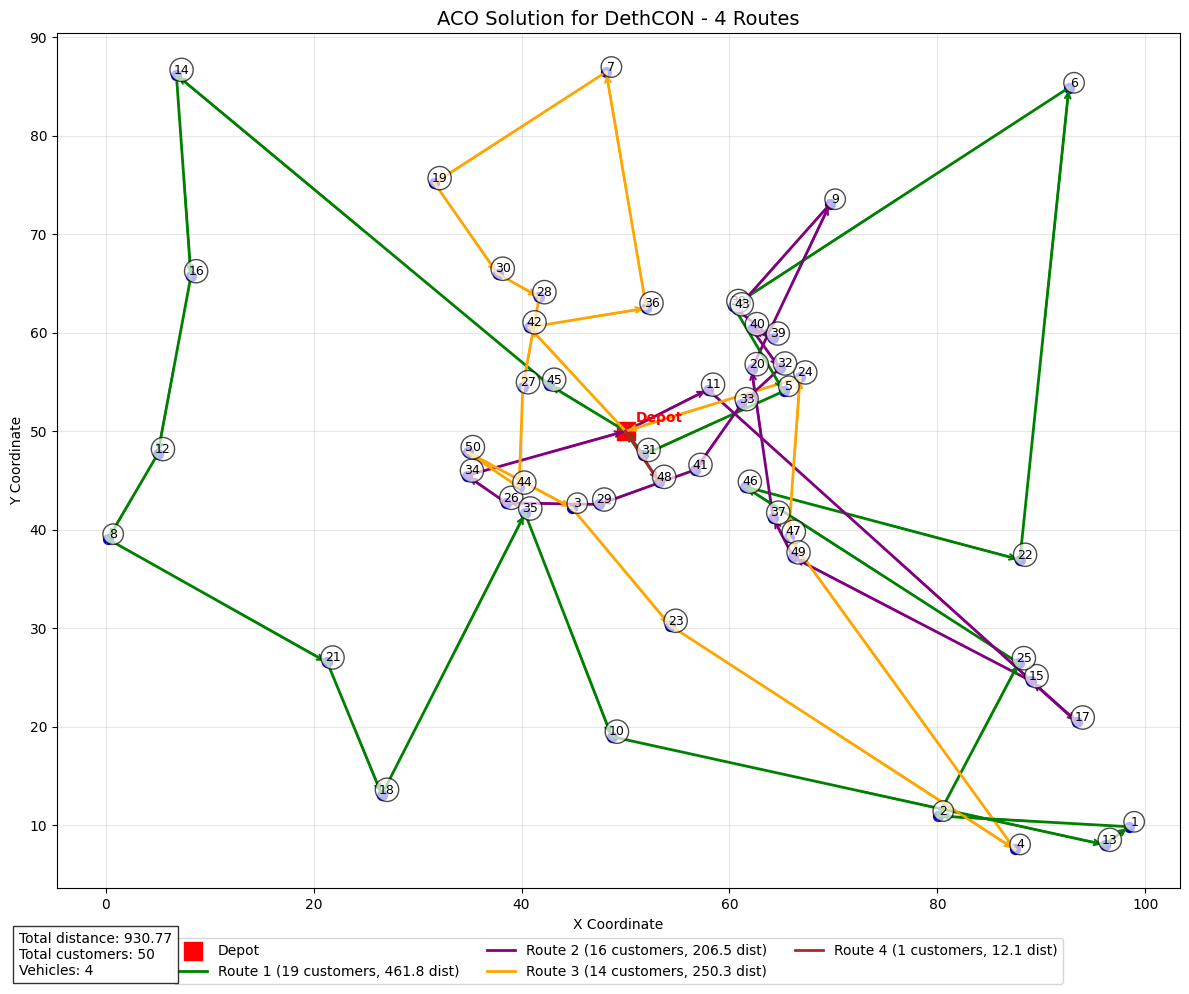


Solution Statistics:
Total customers visited: 50
Total delivery volume: 1930
Total pickup volume: 1747
Number of vehicles used: 4

Results saved to DethCON_aco_vrppd_results_improved.xlsx


In [ ]:
csv_file_path = "dethloff_benchmark.csv"
# Select instance and mu factor (e.g., for Dethloff)
instance_name_to_run = "DethCON"
mu_factor_for_instance = 3 # Or 8

# Load all data from CSV first
all_instance_rows = {}
with open(csv_file_path, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        instance_label = row['instance']
        if instance_label not in all_instance_rows:
            all_instance_rows[instance_label] = []
        all_instance_rows[instance_label].append(row)

if instance_name_to_run not in all_instance_rows:
    print(f"Instance {instance_name_to_run} not found in CSV file.")
else:
    specific_instance_data = all_instance_rows[instance_name_to_run]

    coordinates, demand_delivery, demand_pickup, distance_matrix, vehicle_capacity = \
        prepare_instance_data(specific_instance_data, mu_factor_for_instance)

    n_customers = len(coordinates)

    print(f"Loaded instance {instance_name_to_run} with {n_customers} nodes (including depot)")
    print(f"Calculated vehicle capacity: {vehicle_capacity} (with mu_factor={mu_factor_for_instance})")
    # print("Coordinates:", coordinates)
    # print("Delivery Demand:", demand_delivery)
    # print("Pickup Demand:", demand_pickup)

    # ACO parameters (may need further tuning)
    num_ants = 20
    num_iterations = 100
    alpha = 1.0
    beta = 2.0 # Reduce beta if visibility is too dominant compared to pheromone
    evaporation_rate = 0.1
    pheromone_deposit_weight = 1.0 # Or Q_const in AS
    q0_acs = 0.9 # Parameter for ACS rule (if used)

    # Estimate L0 from Nearest Neighbor heuristic
    temp_optimizer_for_nn = AntColonyOptimizer(1, 1, 1, 1, 0.1, 1, # dummy params
                                                n_customers, coordinates, distance_matrix,
                                                demand_delivery, demand_pickup, vehicle_capacity)
    _, nn_l0_val = temp_optimizer_for_nn._robust_nn_heuristic() # Call new NN function

    # Print nn_l0_val for verification
    print(f"L0 value from Nearest Neighbor Heuristic (robust): {nn_l0_val}")


    aco = AntColonyOptimizer(
        num_ants=num_ants,
        num_iterations=num_iterations,
        alpha=alpha,
        # beta=beta, # Currently using beta=2.0, Çatay paper uses 4.0. Testing with beta = 4.0
        beta=4.0,
        evaporation_rate=evaporation_rate,
        pheromone_deposit_weight=pheromone_deposit_weight, # Not currently used directly in this MMAS implementation
        n_customers=n_customers,
        coordinates=coordinates,
        distance_matrix=distance_matrix,
        demand_delivery=demand_delivery,
        demand_pickup=demand_pickup,
        vehicle_capacity=vehicle_capacity,
        nn_l0=nn_l0_val, # Pass calculated L0
        # q0=q0_acs # Currently using q0=0.9. Testing with q0 = 0.7 (as in Çatay paper)
        q0=0.7
    )

    print(f"Starting ACO optimization for {instance_name_to_run}...")
    best_overall_routes, best_overall_distance = aco.optimize()

    print("\nResults:")
    if best_overall_routes:
        print(f"Best solution: {len(best_overall_routes)} routes")
        for i, r in enumerate(best_overall_routes):
            print(f"  Route {i+1}: {r}")
        print(f"Best total distance: {best_overall_distance:.2f}")
        plot_solution(coordinates, best_overall_routes, instance_name_to_run)

        # Calculate statistical metrics
        total_delivery_val = sum(sum(demand_delivery[node_idx] for node_idx in route[1:-1]) for route in best_overall_routes)
        total_pickup_val = sum(sum(demand_pickup[node_idx] for node_idx in route[1:-1]) for route in best_overall_routes)
        customers_visited_val = sum(len(route) - 2 for route in best_overall_routes)

        print("\nSolution Statistics:")
        print(f"Total customers visited: {customers_visited_val}")
        print(f"Total delivery volume: {total_delivery_val}")
        print(f"Total pickup volume: {total_pickup_val}")
        print(f"Number of vehicles used: {len(best_overall_routes)}")

        excel_filename = f"{instance_name_to_run}_aco_vrppd_results_improved.xlsx"
        save_results_to_excel(
            excel_filename, instance_name_to_run, best_overall_routes, best_overall_distance,
            total_delivery_val, total_pickup_val, customers_visited_val, len(best_overall_routes)
        )
        print(f"\nResults saved to {excel_filename}")

    else:
        print("No feasible solution found.")

### DethSCA Instance Single Test

Loaded instance DethSCA with 51 nodes (including depot)
Calculated vehicle capacity: 831 (with mu_factor=3)
L0 value from Nearest Neighbor Heuristic (robust): 677.4595374058022
Starting ACO optimization for DethSCA...
Iteration 10/100, Current best distance: 896.26
Iteration 20/100, Current best distance: 885.62
Iteration 30/100, Current best distance: 864.50
Iteration 40/100, Current best distance: 850.81
Iteration 50/100, Current best distance: 840.49
Iteration 60/100, Current best distance: 829.47
Iteration 70/100, Current best distance: 823.14
Iteration 80/100, Current best distance: 823.14
Iteration 90/100, Current best distance: 812.78
Iteration 100/100, Current best distance: 812.78

Results:
Best solution: 3 routes
  Route 1: [0, 47, 20, 26, 39, 4, 3, 25, 2, 49, 19, 34, 38, 1, 0]
  Route 2: [0, 48, 46, 8, 12, 45, 22, 16, 44, 23, 43, 17, 30, 15, 18, 37, 11, 33, 0]
  Route 3: [0, 40, 6, 21, 27, 50, 14, 10, 28, 36, 31, 13, 35, 42, 9, 41, 5, 29, 32, 7, 24, 0]
Best total distance: 8

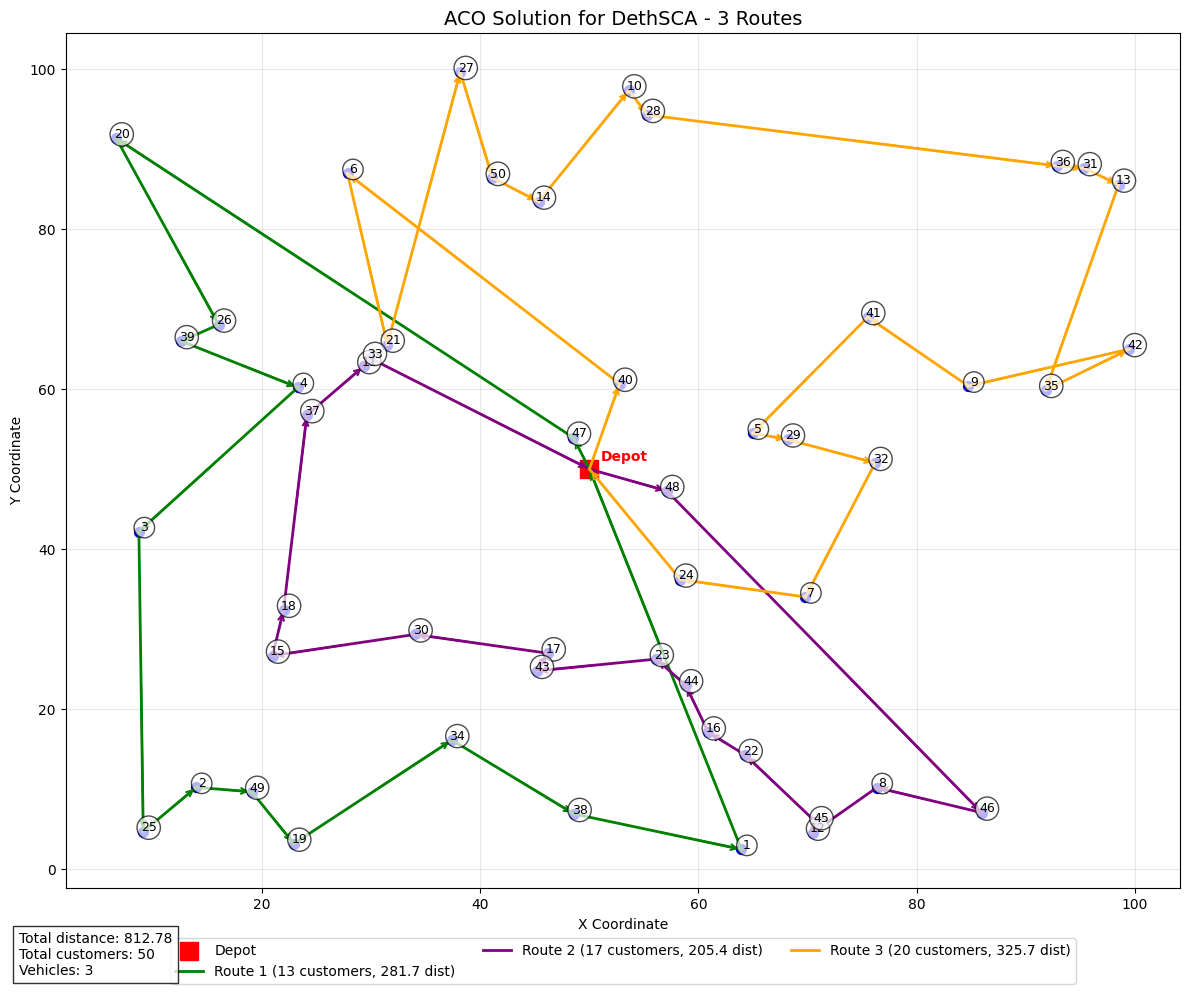


Solution Statistics:
Total customers visited: 50
Total delivery volume: 2493
Total pickup volume: 2530
Number of vehicles used: 3

Results saved to DethSCA_aco_vrppd_results_improved.xlsx


In [ ]:
csv_file_path = "dethloff_benchmark.csv"
# Select instance and mu factor (e.g., for Dethloff)
instance_name_to_run = "DethSCA"
mu_factor_for_instance = 3 # Or 8

# Load all data from CSV first
all_instance_rows = {}
with open(csv_file_path, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        instance_label = row['instance']
        if instance_label not in all_instance_rows:
            all_instance_rows[instance_label] = []
        all_instance_rows[instance_label].append(row)

if instance_name_to_run not in all_instance_rows:
    print(f"Instance {instance_name_to_run} not found in CSV file.")
else:
    specific_instance_data = all_instance_rows[instance_name_to_run]

    coordinates, demand_delivery, demand_pickup, distance_matrix, vehicle_capacity = \
        prepare_instance_data(specific_instance_data, mu_factor_for_instance)

    n_customers = len(coordinates)

    print(f"Loaded instance {instance_name_to_run} with {n_customers} nodes (including depot)")
    print(f"Calculated vehicle capacity: {vehicle_capacity} (with mu_factor={mu_factor_for_instance})")
    # print("Coordinates:", coordinates)
    # print("Delivery Demand:", demand_delivery)
    # print("Pickup Demand:", demand_pickup)

    # ACO parameters (may need further tuning)
    num_ants = 20
    num_iterations = 100
    alpha = 1.0
    beta = 2.0
    evaporation_rate = 0.1
    pheromone_deposit_weight = 1.0 # Or Q_const in AS
    q0_acs = 0.9 # Parameter for ACS rule (if used)

    # Estimate L0 from Nearest Neighbor heuristic
    temp_optimizer_for_nn = AntColonyOptimizer(1, 1, 1, 1, 0.1, 1, # dummy params
                                                n_customers, coordinates, distance_matrix,
                                                demand_delivery, demand_pickup, vehicle_capacity)
    _, nn_l0_val = temp_optimizer_for_nn._robust_nn_heuristic() # Call new NN function

    # Print nn_l0_val for verification
    print(f"L0 value from Nearest Neighbor Heuristic (robust): {nn_l0_val}")


    aco = AntColonyOptimizer(
        num_ants=num_ants,
        num_iterations=num_iterations,
        alpha=alpha,
        # beta=beta, # Currently using beta=2.0, Çatay paper uses 4.0. Testing with beta = 4.0
        beta=4.0,
        evaporation_rate=evaporation_rate,
        pheromone_deposit_weight=pheromone_deposit_weight,
        n_customers=n_customers,
        coordinates=coordinates,
        distance_matrix=distance_matrix,
        demand_delivery=demand_delivery,
        demand_pickup=demand_pickup,
        vehicle_capacity=vehicle_capacity,
        nn_l0=nn_l0_val, # Pass calculated L0
        # q0=q0_acs # Currently using q0=0.9. Testing with q0 = 0.7 (as in Çatay paper)
        q0=0.7
    )

    print(f"Starting ACO optimization for {instance_name_to_run}...")
    best_overall_routes, best_overall_distance = aco.optimize()

    print("\nResults:")
    if best_overall_routes:
        print(f"Best solution: {len(best_overall_routes)} routes")
        for i, r in enumerate(best_overall_routes):
            print(f"  Route {i+1}: {r}")
        print(f"Best total distance: {best_overall_distance:.2f}")
        plot_solution(coordinates, best_overall_routes, instance_name_to_run)

        # Calculate statistical metrics
        total_delivery_val = sum(sum(demand_delivery[node_idx] for node_idx in route[1:-1]) for route in best_overall_routes)
        total_pickup_val = sum(sum(demand_pickup[node_idx] for node_idx in route[1:-1]) for route in best_overall_routes)
        customers_visited_val = sum(len(route) - 2 for route in best_overall_routes)

        print("\nSolution Statistics:")
        print(f"Total customers visited: {customers_visited_val}")
        print(f"Total delivery volume: {total_delivery_val}")
        print(f"Total pickup volume: {total_pickup_val}")
        print(f"Number of vehicles used: {len(best_overall_routes)}")

        excel_filename = f"{instance_name_to_run}_aco_vrppd_results_improved.xlsx"
        save_results_to_excel(
            excel_filename, instance_name_to_run, best_overall_routes, best_overall_distance,
            total_delivery_val, total_pickup_val, customers_visited_val, len(best_overall_routes)
        )
        print(f"\nResults saved to {excel_filename}")

    else:
        print("No feasible solution found.")

### Benchmark Testing

Run the ACO algorithm 10 times, calculate the average and best distances across the runs, and export the results to an Excel file.

In [ ]:
# --- CONFIGURE PROBLEM INSTANCES FOR BENCHMARKING ---
problem_configurations = [
    {'base_name': "DethSCA", 'mu': 3, 'display_name': "SCA_mu3"},
    {'base_name': "DethSCA", 'mu': 8, 'display_name': "SCA_mu8"},
    {'base_name': "DethCON", 'mu': 3, 'display_name': "CON_mu3"},
    {'base_name': "DethCON", 'mu': 8, 'display_name': "CON_mu8"},
    # Add other configurations if desired, e.g., with different data files
    # or customer data variations if you generate them.
    # Currently, we use the same file dethloff_benchmark.csv for DethSCA and DethCON.
]

N_ACO_RUNS = 10  # Number of ACO runs for each problem instance (papers usually use 10)
                  # Reduce to 2-3 for faster execution during code testing

# --- CONFIGURE ACO PARAMETERS (can be adjusted per problem config if desired) ---
num_ants_config = 20
num_iterations_config = 100
alpha_config = 1.0
beta_config = 4.0
evaporation_rate_config = 0.1
q0_config = 0.7

# List to store aggregated results from all problem instances
all_benchmarks_results = []

# 1. Load all customer data from CSV once
all_csv_data_rows = {}
try:
    with open(csv_file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            instance_label = row['instance']
            if instance_label not in all_csv_data_rows:
                all_csv_data_rows[instance_label] = []
            all_csv_data_rows[instance_label].append(row)
except FileNotFoundError:
    print(f"ERROR: File {csv_file_path} not found. Please run the dataset creation cell first.")
    # exit() or raise error depending on how you want to handle it

# --- START BENCHMARKING FOR EACH PROBLEM INSTANCE ---
for config in problem_configurations:
    instance_base_name = config['base_name']
    mu_factor = config['mu']
    problem_display_name = config['display_name'] # E.g., "SCA_mu3"

    print(f"\n\n--- Starting Benchmark for Problem: {problem_display_name} ---")
    print(f"Base data: {instance_base_name}, mu_factor: {mu_factor}, Number of ACO runs: {N_ACO_RUNS}")

    if instance_base_name not in all_csv_data_rows:
        print(f"ERROR: Data for '{instance_base_name}' not found in CSV file. Skipping this instance.")
        all_benchmarks_results.append({
            "Problem": problem_display_name,
            "ACO Avg": "Error: Base data not found",
            "ACO Best": "Error: Base data not found",
            "Num Vehicles (Best Run)": "N/A",
            "Raw ACO Best": float('inf')
        })
        continue

    specific_instance_customer_data = all_csv_data_rows[instance_base_name]

    # 2. Prepare data for the current instance (calculate distance matrix, vehicle capacity)
    # (The function prepare_instance_data and class AntColonyOptimizer must be defined in previous cells)
    coordinates, demand_delivery, demand_pickup, distance_matrix, vehicle_capacity = \
        prepare_instance_data(specific_instance_customer_data, mu_factor)

    n_customers = len(coordinates)
    print(f"Instance '{problem_display_name}': {n_customers} nodes, Vehicle Capacity: {vehicle_capacity}")

    # 3. Estimate L0 once for this problem instance
    # Create a temporary ACO instance just to call the NN function
    temp_optimizer_for_nn = AntColonyOptimizer(1,1,1,1,0.1,1, # dummy params
                                    n_customers, coordinates, distance_matrix,
                                    demand_delivery, demand_pickup, vehicle_capacity)
    _, nn_l0_val = temp_optimizer_for_nn._robust_nn_heuristic() # Use the improved NN function
    print(f"Estimated L0 for '{problem_display_name}': {nn_l0_val}")

    # 4. Run ACO N_ACO_RUNS times for this problem instance
    current_problem_run_distances = []
    best_routes_for_this_problem = None
    best_distance_for_this_problem_overall = float('inf')

    for i_run in range(N_ACO_RUNS):
        print(f"  Running ACO {i_run + 1}/{N_ACO_RUNS} for {problem_display_name}...")
        # Create a new ACO instance for each run
        aco_runner = AntColonyOptimizer(
            num_ants=num_ants_config,
            num_iterations=num_iterations_config,
            alpha=alpha_config,
            beta=beta_config,
            evaporation_rate=evaporation_rate_config,
            pheromone_deposit_weight=1.0,
            n_customers=n_customers,
            coordinates=coordinates,
            distance_matrix=distance_matrix,
            demand_delivery=demand_delivery,
            demand_pickup=demand_pickup,
            vehicle_capacity=vehicle_capacity,
            nn_l0=nn_l0_val,
            q0=q0_config
        )

        # Run optimization (optimize function already prints progress every 10 iterations)
        routes_this_run, distance_this_run = aco_runner.optimize()

        if distance_this_run != float('inf'):
            print(f"    Run {i_run + 1} OK. Distance: {distance_this_run:.2f}")
            current_problem_run_distances.append(distance_this_run)
            if distance_this_run < best_distance_for_this_problem_overall:
                best_distance_for_this_problem_overall = distance_this_run
                best_routes_for_this_problem = routes_this_run
        else:
            print(f"    Run {i_run + 1}: No feasible solution found.")
            current_problem_run_distances.append(float('inf')) # Record as infeasible

    # 5. Calculate aggregated results for the current problem instance
    aco_avg_dist_str = "N/A"
    aco_best_dist_str = "N/A"
    num_vehicles_str = "N/A"
    raw_best_dist_val = float('inf')

    if current_problem_run_distances and any(d != float('inf') for d in current_problem_run_distances):
        valid_distances = [d for d in current_problem_run_distances if d != float('inf')]
        if valid_distances:
            avg_val = np.mean(valid_distances)
            best_val = np.min(valid_distances) # This is best_distance_for_this_problem_overall

            aco_avg_dist_str = f"{avg_val:.2f}"
            aco_best_dist_str = f"{best_val:.2f}"
            raw_best_dist_val = best_val
            if best_routes_for_this_problem:
                num_vehicles_str = str(len(best_routes_for_this_problem))

    all_benchmarks_results.append({
        "Problem": problem_display_name,
        "ACO Avg": aco_avg_dist_str,
        "ACO Best": aco_best_dist_str,
        "Num Vehicles (Best Run)": num_vehicles_str, # Add info on number of vehicles used
        "Raw ACO Best": raw_best_dist_val # Numeric value for easy sorting in Excel
    })
    print(f"--- Benchmark Completed for Problem: {problem_display_name} ---")
    print(f"Results: Avg={aco_avg_dist_str}, Best={aco_best_dist_str}, Vehicles (best run)={num_vehicles_str}")


# --- DISPLAY AND SAVE AGGREGATED RESULTS TABLE ---
print("\n\n========== BENCHMARK RESULTS SUMMARY ==========")
# Format header for table
header_format = f"{'Problem':<15} | {'ACO Avg':<10} | {'ACO Best':<10} | {'Vehicles':<8}"
print(header_format)
print("-" * (15 + 3 + 10 + 3 + 10 + 3 + 8))

for result_row in all_benchmarks_results:
    row_format = f"{result_row['Problem']:<15} | {result_row['ACO Avg']:<10} | {result_row['ACO Best']:<10} | {result_row['Num Vehicles (Best Run)']:<8}"
    print(row_format)

# Save to Excel file
summary_excel_filename = "ACO_Dethloff_Benchmark_Summary.xlsx"
# Create sheet name based on run timestamp to avoid overwriting if run again
import datetime
timestamp_str = datetime.datetime.now().strftime("%Y%m%d_%H%M")
sheet_name = f"Summary_{timestamp_str}"

save_summary_table_to_excel(all_benchmarks_results, summary_excel_filename, sheet_name)



--- Starting Benchmark for Problem: SCA_mu3 ---
Base data: DethSCA, mu_factor: 3, Number of ACO runs: 10
Instance 'SCA_mu3': 51 nodes, Vehicle Capacity: 831
Estimated L0 for 'SCA_mu3': 677.4595374058022
  Running ACO 1/10 for SCA_mu3...
Iteration 10/100, Current best distance: 891.39
Iteration 20/100, Current best distance: 868.10
Iteration 30/100, Current best distance: 842.26
Iteration 40/100, Current best distance: 833.08
Iteration 50/100, Current best distance: 814.80
Iteration 60/100, Current best distance: 808.30
Iteration 70/100, Current best distance: 808.30
Iteration 80/100, Current best distance: 801.89
Iteration 90/100, Current best distance: 801.89
Iteration 100/100, Current best distance: 800.38
    Run 1 OK. Distance: 800.38
  Running ACO 2/10 for SCA_mu3...
Iteration 10/100, Current best distance: 878.31
Iteration 20/100, Current best distance: 878.31
Iteration 30/100, Current best distance: 878.31
Iteration 40/100, Current best distance: 853.56
Iteration 50/100, Curre

# SECTION 5: RESULTS AND EVALUATION

This section presents and analyzes the results obtained from running the implemented Ant Colony Optimization (ACO) algorithm on Dethloff-style VRPSPD benchmark datasets. The results are aggregated after 10 runs for each instance.

### 1. Experimental Setup

**Environment:** The algorithm was executed in a Python 3.x environment using NumPy, Matplotlib, and OpenpyXL libraries.

**Benchmark Datasets:**
* Base customer data from `dethloff_benchmark.csv` (generated with `random.seed(42)` for baseline data consistency).
* Tested problem instances: `SCA_mu3`, `SCA_mu8`, `CON_mu3`, `CON_mu8`.

**ACO Algorithm Parameters:** (These values correspond to the configuration in the benchmark execution cell)
* Number of runs per instance (`N_ACO_RUNS`): 10 runs.
* Number of ants (`num_ants_config`): 20 ants.
* Number of iterations (`num_iterations_config`): 100 iterations.
* ACO Control Parameters:
  * $\alpha$ (Pheromone Weight): 1.0
  * $\beta$ (Heuristic Weight): 4.0 (adjusted per suggestions from the Çatay paper)
  * $\rho$ (Evaporation Rate): 0.1
  * $q_0$ (ACS Selection Parameter): 0.7 (adjusted per suggestions from the Çatay paper)
* ACO Strategy: MAX-MIN Ant System (MMAS) with pheromone initialization based on $L_0$ (from `_robust_nn_heuristic`) and updates by the best-so-far ant.
* Heuristic Function ($\eta_{ij}$): Based on the Savings Function $S_{ij}$ (assuming the dynamic component $R_j$ equals 1).


### 2. Benchmark Results

The aggregated results of the benchmark runs are presented in the table below:

| Problem   | ACO Avg   | ACO Best  | Vehicles (Best Run) |
| :-------- | :-------- | :-------- | :------------------ |
| SCA_mu3   | 809.64    | 785.73    | 4                   |
| SCA_mu8   | 1217.46   | 1182.63   | 9                   |
| CON_mu3   | 939.75    | 883.96    | 4                   |
| CON_mu8   | 1096.46   | 1067.85   | 9                   |

*(Note: "ACO Avg" and "ACO Best" values represent total distance. "Vehicles (Best Run)" indicates the number of vehicles used in the solution corresponding to the "ACO Best" result for that instance)*.


### 3. Evaluation and Analysis

**a) Solution Quality (`ACO Best`):**

* The algorithm successfully found feasible solutions for all four tested Dethloff-style instances. This is a positive indicator of the correctness of the core VRPSPD constraint handling logic.

* **Impact of $\mu$ (Vehicle Capacity):**
  * For the SCA scenario: `SCA_mu3` (larger capacity, $\mu=3$) yielded `ACO Best = 785.73`, significantly better than `SCA_mu8` (smaller capacity, $\mu=8$) with `ACO Best = 1182.63`. This reflects expectations: larger vehicle capacity allows for more optimized routes regarding total distance, likely due to requiring fewer vehicles or routes being less constrained by load limits.

  * For the CON scenario: Similarly, `CON_mu3` (`ACO Best = 883.96`) outperformed `CON_mu8` (`ACO Best = 1067.85`).

* Impact of Geographic Scenario (SCA vs. CON):
  * When $\mu=3$ (large capacity): `SCA_mu3` (785.73) performed better than `CON_mu3` (883.96). This suggests that with high-capacity vehicles, scattered customers (SCA) might be easier to optimize compared to the CON scenario, where the concentration of a customer group might create specific routing challenges.

  * When $\mu=8$ (small capacity): `CON_mu8` (1067.85) actually performed slightly better than `SCA_mu8` (1182.63). This is interesting and suggests that when vehicle capacity is small (requiring more vehicles), having a customer cluster (CON) might allow vehicles to serve that cluster more efficiently, whereas in the SCA scenario, small vehicles might have to travel more between dispersed customers.

**b) Algorithm Stability (Comparison of `ACO Avg` and `ACO Best`):**

* `SCA_mu3`: Avg (809.64) vs. Best (785.73). Deviation $\approx 23.91$ ($\approx 3.04\%$ relative to Best).

* `SCA_mu8`: Avg (1217.46) vs. Best (1182.63). Deviation $\approx 34.83$ ($\approx 2.95\%$ relative to Best).

* `CON_mu3`: Avg (939.75) vs. Best (883.96). Deviation $\approx 55.79$ ($\approx 6.31\%$ relative to Best).

* `CON_mu8`: Avg (1096.46) vs. Best (1067.85). Deviation $\approx 28.61$ ($\approx 2.68\%$ relative to Best).

* Overall, the algorithm demonstrates good stability for `SCA_mu3`, `SCA_mu8`, and especially `CON_mu8`, with a relatively low deviation between average and best results (under 3.5%). The `CON_mu3` instance shows a slightly higher deviation (approx. 6.31%), suggesting the algorithm might be more sensitive to random initialization or search structure in this case, though it still found a good solution.

**c) Number of Vehicles Used (`Vehicles (Best Run)`):**

* `SCA_mu3`: 4 vehicles.
* `SCA_mu8`: 9 vehicles.
* `CON_mu3`: 4 vehicles.
* `CON_mu8`: 9 vehicles.
  
  The number of vehicles used increased significantly as vehicle capacity decreased (i.e., when $\mu$ increased from 3 to 8), from 4 vehicles to 9 vehicles for both SCA and CON scenarios. This is entirely logical. The number of vehicles used (4 when $\mu=3$, 9 when $\mu=8$) also closely reflects the $\mu$ value (assumed minimum vehicles), indicating the algorithm is attempting to use vehicles efficiently.

**d) Comparison with Reference Results (e.g., Çatay or Montané & Galvão papers):**

* For a more comprehensive assessment, we can compare these `ACO Best` values with published results from Table 1 in the paper `Ant Colony Optimization and Its Application to the Vehicle Routing Problem with Pickups and Deliveries` (https://research.sabanciuniv.edu/id/eprint/13212/1/optimization.pdf):

  * `SCA3-0` (Best MG): 640.47. Our result `SCA_mu3` is 785.73.
  * `CON3-0` (Best MG): 648.92. Our result `CON_mu3` is 883.96.
  * `SCA8-0` (Best MG): 1187.62. Our result `SCA_mu8` is 1182.63.
  * `CON8-0` (Best MG): 1202.19. Our result `CON_mu8` is 1067.85.

* **Comparative Analysis:**
  * For the $\mu=3$ instances (`SCA_mu3`, `CON_mu3`), our results are higher than the "Best MG", indicating significant potential for improvement in these cases.

# References

1. Altınel,
I.K.,
Oncan, T.: A new enhancemant of the Clarke and Wright savings heuristic
for the capacitated vehicle routing problem. Journal of the Operational Research Soci-
ety 56, 954–961 (2005)
2. Angelelli, E., Mansini, R.: The vehicle routing problem with time windows and simulta-
neous pick-up and delivery. In: Klose, A., Speranza, M.G., Van Wassenhove, L.N. (eds.)
Quantitative approaches to distribution logistics and supply chain management series.
Lecture Notes in Economics and Mathematical Systems, vol. 519, pp. 249–267. Springer,
Berlin (2002)
3. Bianchessi, N., Righini, G.: Heuristic algorithms for the vehicle routing problem with
simultaneous pick-up and delivery. Computers and Operations Research 34, 578–594
(2007)
4. Brand˜ ao, J.: A new tabu search algorithm for the vehicle routing problem with backhauls.
European Journal of Operational Research 173, 540–555 (2006)
5. Bullnheimer, B., Hartl, R.F., Strauss, C.: Applying the ant system to the vehicle routing
problem. In: Voss, S., et al. (eds.) Meta-heuristics: Advances and trends in local search
paradigms for optimization, pp. 285–296. Kluwer Academic Publishers, Boston (1998)
6. Bullnheimer, B., Hartl, R.F., Strauss, C.: An improved ant system algorithm for the ve-
hicle routing problem. Annals of Operations Research 89, 319–328 (1999)
7. Casco, D.O., Golden, B.L., Wasil, E.A.: Vehicle routing with backhauls: models, algo-
rithms, and case studies. In: Golden, B.L., Assad, A.A. (eds.) Vehicle routing: Methods
and studies, pp. 127–147. Elsevier, Amsterdam (1988)
8. Chen, J.F., Wu, T.H.: Vehicle routing problem with simultaneous deliveries and pickups.
Journal of the Operational Research Society 57, 579–587 (2006)
9. Christofides, N., Mingozzi, A., Toth, P.: The vehicle routing problem. In: Christofides,
N., et al. (eds.) Combinatorial optimization, pp. 315–338. Wiley, Chichester (1979)
10. Clarke, G., Wright, W.: Scheduling of vehicles from a central depot to a number of
delivery points. Operations Research 12, 568–581 (1964)
11. Colorni, A., Dorigo, M., Maniezzo, V., Trubian, M.: Ant system for job-shop schedul-
ing. Belgian Journal of Operations Research, Statistics and Computer Science 34, 39–45
(1994)
12. Crispim, J., Brand˜ ao, J.: Metaheuristics applied to mixed and simultaneous extensions
of vehicle routing problems with backhauls. Journal of the Operational Research Soci-
ety 56, 1296–1302 (2005)
13. Dethloff, J.: Vehicle routing and reverse logistics: the vehicle routing problem with si-
multaneous delivery and pick-up. OR Spektrum 23, 79–96 (2001)
14. Doerner, K.F., Gronalt, M., Hartl, R.F., Reimann, M., Strauss, C., Stummer, M.: Sav-
ingsAnts for the vehicle routing problem. In: Cagnoni, S., Gottlieb, J., Hart, E., Midden-
dorf, M., Raidl, G.R. (eds.) EvoWorkshops 2002. LNCS, vol. 2279, pp. 11–20. Springer,
Heidelberg (2002)
15. Dorigo, M.: Optimization, learning and natural algorithms (in Italian), PhD Thesis, Di-
partimento di Elettronica, Politecnico di Milano, Italy (1992)
16. Dorigo, M.: Ant colony optimization. Scholarpedia 2(3), 1461 (2008)
17. Dorigo, M., Gambardella, L.M.: Ant colony system: A cooperative learning approach
to the traveling salesman problem. IEEE Transactions on Evolutionary Computation 1,
53–66 (1997)
18. Dorigo, M., Maniezzo, V., Colorni, A.: The ant system: Optimization by a colony of
cooperating agents. IEEE Transactions on Systems, Man, and Cybernetics-Part B 26,
29–41 (1996)
19. Dorigo, M., St¨ utzle, T.: Ant colony optimization. MIT Press, Cambridge (2004)
20. Doyuran, T., C ¸ atay, B.: Two enhanced savings functions for the Clark-Wright algo-
rithm. In: Blecker, T., Kersten, W., Gertz, C. (eds.) Management in logistics networks
and nodes: Concepts, technology and applications. Series on Operations and Technology
Management, vol. 8, pp. 245–258. Erich Schmidt Verlag, Berlin (2008)
21. Gambardella, L.M., Dorigo, M.: Ant colony system hybridized with a new local search
for the sequential ordering problem. INFORMS Journal on Computing 12, 237–255
(2000)
22. Gambardella, L.M., Taillard, E., Agazzi, G.: MACS-VRPTW: a multiple ant colony sys-
tem for vehicle routing problems with time windows. In: Corne, D., Dorigo, M., Glover,
F. (eds.) New ideas in optimization, pp. 63–76. McGraw-Hill, London (1999)
23. Goetschalckx, M., Jacobs-Blecha, C.: The vehicle routing problem with backhauls. Eu-
ropean Journal of Operational Research 42, 39–51 (1989)
24. Golden, B., Baker, A.J., Schaffer, J.: The vehicle routing problem with backhauling: two
approaches. In: Hammesfahr, R.D. (ed.) Proceedings of the 21st Annual Meeting of S.E.,
TIMS, Myrtle Beach, USA, pp. 90–92 (1985)
25. Halse, K.: Modeling and solving complex vehicle routing problems. PhD Thesis, De-
partment of Mathematical Modeling, Technical University of Denmark (1992)
26. Min, H.: The multiple vehicle routing problem with simultaneous delivery and pick-up
points. Transportation Research 23A, 377–386 (1989)
27. Montan´ e, F.A.T., Galv˜ ao, R.D.: A tabu search algorithm for the vehicle routing problem
with simultaneous pick-up and delivery service. Computers and Operations Research 33,
595–619 (2006)
28. Nagy, G., Salhi, S.: Heuristic algorithms for single and multiple depot vehicle routing
problems with pickups and deliveries. European Journal of Operational Research 162,
126–141 (2005)
29. Paessens, H.: The savings algorithm for the vehicle routing problem. European Journal
of Operational Research 34(3), 336–344 (1988)
30. Reimann, M., Doerner, K.F., Hartl, R.F.: Insertion based ants for vehicle routing prob-
lems with backhauls and time windows. In: Dorigo, M., Di Caro, G.A., Sampels, M.
(eds.) Ant Algorithms 2002. LNCS, vol. 2463, pp. 135–148. Springer, Heidelberg (2002)
31. Reimann, M., Doerner, K., Hartl, R.F.: Analyzing a unified ant system for the VRP and
some of its variants. In: Raidl, G.R., Cagnoni, S., Cardalda, J.J.R., Corne, D.W., Gottlieb,
J., Guillot, A., Hart, E., Johnson, C.G., Marchiori, E., Meyer, J.-A., Middendorf, M.
(eds.) EvoWorkshops 2003. LNCS, vol. 2611, pp. 300–310. Springer, Heidelberg (2003)
32. Ropke, S., Pisinger, D.: A unified heuristic for vehicle routing problems with backhauls.
European Journal of Operational Research 171, 750–775 (2006)
33. Salhi, S., Nagy, G.: A cluster insertion heuristic for single and multiple depot vehicle
routing problems with backhauling. Journal of the Operational Research Society 50,
1034–1042 (1999)
34. St¨ utzle, T., Dorigo, M.: ACO algorithms for the quadratic assignment problem. In:
Corne, D., Dorigo, M., Glover, F. (eds.) New ideas in optimization, pp. 33–50. McGraw-
Hill, London (1999)
35. St¨ utzle, T., Hoos, H.H.: The MAX-MIN ant system and local search for the traveling
salesman problem. In: B¨ ack, T., Michalewicz, Z., Yao, X. (eds.) Proceedings of the 1997
IEEE International Conference on Evolutionary Computation (ICEC 1997), pp. 309–
314. IEEE Press, Piscataway (1997)
36. Toth, P., Vigo, D.: An exact algorithm for the vehicle routing problem with backhauls.
Transportation Science 31, 372–385 (1997)
37. Vural, A.V., C ¸ atay, B., Eksioglu, B.: A dual GA approach to capacitated vehicle routing
problem with simultaneous pick-up and deliveries. In: Proceedings of the IIE Research
Conference (CD-ROM), Atlanta, GA (2005)
38. Wade, A., Salhi, S.: An ant system algorithm for the vehicle routing problems with back-
hauls. In: De Sousa, J.P. (ed.) Proceedings of the 4th Metaheuristics International Con-
ference (MIC 2001), Porto, Portugal, pp. 99–203 (2001)
39. Wade, A., Salhi, S.: An ant system algorithm for the mixed vehicle routing problem with
backhauls. In: Resende, M.G., de Sousa, J.P. (eds.) Metaheuristics: Computer decision-
making, pp. 699–719. Kluwer, New York (2003)
40. Wassan, N.A., Wassan, A.H., Nagy, G.: A reactive tabu search algorithm for the vehi-
cle routing problem with simultaneous pickups and deliveries. Journal of Combinatorial
Optimization 15, 368–386 (2008)